In [1]:
import pandas as pd
import numpy as np
import ast

In [2]:
# rm -r '/data/home/ubuntu/BO_tagging/field notebooks/life_sci'

In [3]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [4]:
from sklearn.utils import class_weight
import numpy as np
from keras.callbacks import EarlyStopping
import h5py


In [5]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json
img_rows, img_cols, img_channel = 224, 224, 3
import  keras
from keras.layers import (Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D,
                          BatchNormalization, Input, Conv2D, GlobalAveragePooling2D)
from keras.applications.resnet50 import ResNet50
from keras.callbacks import ModelCheckpoint
from keras import metrics
from keras.optimizers import Adam 
from keras import backend as K
import keras
from keras.models import Model
import keras
# from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")

# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
# import cv2

In [6]:
import keras
print(keras.__version__)

2.2.4


In [7]:
pwd

'/user_data/BO_tagging/field notebooks'

In [8]:
TRAIN_DIR = '/user_data/BO_tagging/field notebooks/physical_sci/'

In [9]:
train_images_dogs_cats = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]

In [10]:
len(train_images_dogs_cats)

9158

In [11]:
key =  ['Electrical and Electronics',
 'Heat',
 'Inorganic Chemistry',
 'Matter and Energy',
 'Mechanical Waves and Oscillations',
 'Mechanics',
 'Optics',
 'Organic Chemistry',
 'Physical Chemistry',
 'Physical Sciences',
 'Purification of matter',
 'Universe and solar system']

In [12]:
dict1={}
for i, value in enumerate(key):
    dict1[value] = i

In [13]:
len(dict1)

12

In [14]:
dict1

{'Electrical and Electronics': 0,
 'Heat': 1,
 'Inorganic Chemistry': 2,
 'Matter and Energy': 3,
 'Mechanical Waves and Oscillations': 4,
 'Mechanics': 5,
 'Optics': 6,
 'Organic Chemistry': 7,
 'Physical Chemistry': 8,
 'Physical Sciences': 9,
 'Purification of matter': 10,
 'Universe and solar system': 11}

In [15]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import re
import cv2

In [16]:
def prepare_data(list_of_images):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    x = [] # images as arrays
    y=[]
    
    for image in tqdm(list_of_images):
        try:
            x.append(cv2.resize(cv2.imread(image, cv2.IMREAD_GRAYSCALE), (224,224), interpolation=cv2.INTER_CUBIC))
            z= image.split('/')[-1].split('.')[0].split('_')[0]
            #z=(re.split('\d+',image)[0][-11:])
            print(z)
            y.append(dict1[z])

        except:
            
            continue
    
    return x,y

In [17]:
train_images_dogs_cats[0]


'/user_data/BO_tagging/field notebooks/physical_sci/Inorganic Chemistry_2662.jpg'

In [18]:
X ,Y= prepare_data(train_images_dogs_cats)
#print(K.image_data_format())

  0%|          | 27/9158 [00:00<00:33, 268.86it/s]

Inorganic Chemistry
Heat
Physical Chemistry
Matter and Energy
Organic Chemistry
Heat
Mechanics
Heat
Inorganic Chemistry
Matter and Energy
Electrical and Electronics
Organic Chemistry
Mechanics
Mechanics
Matter and Energy
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Electrical and Electronics
Matter and Energy
Purification of matter
Mechanical Waves and Oscillations
Physical Sciences
Matter and Energy
Optics
Inorganic Chemistry
Physical Sciences
Heat
Optics
Matter and Energy
Mechanical Waves and Oscillations
Mechanics
Electrical and Electronics
Matter and Energy
Mechanics
Matter and Energy
Electrical and Electronics
Organic Chemistry
Physical Chemistry
Mechanics
Electrical and Electronics
Physical Chemistry
Physical Sciences
Optics
Physical Chemistry
Inorganic Chemistry
Physical Sciences
Physical Sciences
Inorganic Chemistry
Universe and solar system
Heat
Optics
Mechanical Waves and Oscillations
Mechanics
Inorganic Chemistry
Electrical and Electronics
Physical Sci

  1%|          | 111/9158 [00:00<00:29, 306.83it/s]

Physical Chemistry
Physical Chemistry
Electrical and Electronics
Mechanics
Mechanics
Physical Chemistry
Electrical and Electronics
Physical Sciences
Heat
Organic Chemistry
Organic Chemistry
Physical Chemistry
Optics
Electrical and Electronics
Organic Chemistry
Organic Chemistry
Matter and Energy
Organic Chemistry
Physical Chemistry
Mechanics
Organic Chemistry
Mechanics
Electrical and Electronics
Organic Chemistry
Mechanical Waves and Oscillations
Organic Chemistry
Matter and Energy
Optics
Mechanics
Optics
Organic Chemistry
Purification of matter
Matter and Energy
Mechanics
Mechanics
Matter and Energy
Mechanical Waves and Oscillations
Purification of matter
Physical Chemistry
Electrical and Electronics
Optics
Organic Chemistry
Physical Sciences
Heat
Optics
Physical Chemistry
Electrical and Electronics
Purification of matter
Physical Chemistry
Matter and Energy
Matter and Energy
Physical Chemistry
Inorganic Chemistry
Optics
Organic Chemistry
Mechanical Waves and Oscillations
Electrical a

  2%|▏         | 188/9158 [00:00<00:27, 328.41it/s]

Heat
Electrical and Electronics
Inorganic Chemistry
Matter and Energy
Organic Chemistry
Universe and solar system
Inorganic Chemistry
Electrical and Electronics
Physical Chemistry
Inorganic Chemistry
Mechanics
Heat
Heat
Optics
Heat
Optics
Electrical and Electronics
Optics
Mechanics
Inorganic Chemistry
Optics
Organic Chemistry
Mechanical Waves and Oscillations
Physical Sciences
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Physical Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Optics
Optics
Heat
Optics
Physical Sciences
Mechanical Waves and Oscillations
Physical Sciences
Electrical and Electronics
Inorganic Chemistry
Physical Sciences
Matter and Energy
Matter and Energy
Universe and solar system
Organic Chemistry
Organic Chemistry
Inorganic Chemistry
Mechanical Waves and Oscillations
Electrical and Electronics
Physical Chemistry
Inorganic Chemistry
Matter and Energy
Matter and Energy
Optics
Inorganic Chemistry
Matter and Energy
Organic Chemistry
He

  3%|▎         | 250/9158 [00:00<00:28, 307.65it/s]

Physical Sciences
Organic Chemistry
Organic Chemistry
Heat
Physical Chemistry
Matter and Energy
Purification of matter
Mechanics
Inorganic Chemistry
Physical Chemistry
Mechanical Waves and Oscillations
Physical Sciences
Electrical and Electronics
Heat
Mechanical Waves and Oscillations
Electrical and Electronics
Matter and Energy
Physical Chemistry
Organic Chemistry
Organic Chemistry
Inorganic Chemistry
Physical Sciences
Mechanical Waves and Oscillations
Matter and Energy
Inorganic Chemistry
Physical Chemistry
Optics
Optics
Heat
Inorganic Chemistry
Mechanical Waves and Oscillations
Universe and solar system
Optics
Purification of matter
Heat
Universe and solar system
Heat
Matter and Energy
Matter and Energy
Inorganic Chemistry
Matter and Energy
Optics
Mechanical Waves and Oscillations
Matter and Energy
Organic Chemistry
Electrical and Electronics
Electrical and Electronics
Purification of matter
Matter and Energy
Heat
Electrical and Electronics
Physical Chemistry
Mechanical Waves and Os

  3%|▎         | 319/9158 [00:00<00:27, 323.93it/s]

Mechanics
Organic Chemistry
Physical Chemistry
Optics
Heat
Mechanics
Matter and Energy
Mechanics
Heat
Organic Chemistry
Inorganic Chemistry
Mechanics
Heat
Electrical and Electronics
Electrical and Electronics
Heat
Heat
Mechanics
Heat
Matter and Energy
Heat
Optics
Electrical and Electronics
Electrical and Electronics
Mechanics
Optics
Heat
Organic Chemistry
Electrical and Electronics
Mechanics
Mechanical Waves and Oscillations
Inorganic Chemistry
Heat
Optics
Mechanical Waves and Oscillations
Electrical and Electronics
Optics
Physical Chemistry
Purification of matter
Physical Sciences
Matter and Energy
Purification of matter
Heat
Mechanical Waves and Oscillations
Optics
Heat
Optics
Inorganic Chemistry
Inorganic Chemistry
Organic Chemistry
Heat
Optics
Organic Chemistry
Organic Chemistry
Mechanics
Optics
Mechanical Waves and Oscillations
Organic Chemistry
Organic Chemistry
Matter and Energy
Physical Chemistry
Mechanics
Electrical and Electronics
Electrical and Electronics
Matter and Energy


  5%|▍         | 428/9158 [00:01<00:22, 384.06it/s]

Matter and Energy
Physical Sciences
Electrical and Electronics
Physical Sciences
Mechanical Waves and Oscillations
Purification of matter
Heat
Organic Chemistry
Optics
Physical Chemistry
Inorganic Chemistry
Inorganic Chemistry
Optics
Inorganic Chemistry
Optics
Matter and Energy
Matter and Energy
Optics
Mechanics
Physical Chemistry
Electrical and Electronics
Physical Chemistry
Physical Sciences
Heat
Physical Chemistry
Inorganic Chemistry
Inorganic Chemistry
Electrical and Electronics
Mechanical Waves and Oscillations
Optics
Optics
Physical Sciences
Mechanics
Electrical and Electronics
Physical Chemistry
Physical Sciences
Matter and Energy
Mechanics
Physical Chemistry
Matter and Energy
Inorganic Chemistry
Universe and solar system
Heat
Mechanics
Mechanics
Inorganic Chemistry
Optics
Matter and Energy
Organic Chemistry
Electrical and Electronics
Physical Sciences
Physical Chemistry
Mechanical Waves and Oscillations
Matter and Energy
Optics
Inorganic Chemistry
Inorganic Chemistry
Mechanical

  6%|▌         | 522/9158 [00:01<00:20, 423.00it/s]

Mechanical Waves and Oscillations
Physical Chemistry
Physical Sciences
Electrical and Electronics
Electrical and Electronics
Heat
Inorganic Chemistry
Electrical and Electronics
Heat
Optics
Universe and solar system
Organic Chemistry
Heat
Physical Sciences
Optics
Heat
Physical Sciences
Mechanics
Inorganic Chemistry
Organic Chemistry
Organic Chemistry
Matter and Energy
Matter and Energy
Organic Chemistry
Optics
Heat
Electrical and Electronics
Organic Chemistry
Electrical and Electronics
Inorganic Chemistry
Physical Sciences
Mechanics
Electrical and Electronics
Heat
Organic Chemistry
Purification of matter
Optics
Mechanics
Optics
Heat
Mechanical Waves and Oscillations
Heat
Matter and Energy
Physical Sciences
Heat
Matter and Energy
Electrical and Electronics
Electrical and Electronics
Physical Chemistry
Optics
Inorganic Chemistry
Optics
Organic Chemistry
Universe and solar system
Inorganic Chemistry
Physical Chemistry
Organic Chemistry
Organic Chemistry
Heat
Electrical and Electronics
Elec

  6%|▌         | 566/9158 [00:01<00:23, 362.49it/s]

Heat
Matter and Energy
Physical Sciences
Physical Sciences
Matter and Energy
Electrical and Electronics
Organic Chemistry
Electrical and Electronics
Universe and solar system
Physical Chemistry
Inorganic Chemistry
Physical Chemistry
Heat
Inorganic Chemistry
Optics
Inorganic Chemistry
Inorganic Chemistry
Mechanics
Mechanical Waves and Oscillations
Mechanics
Optics
Mechanics
Inorganic Chemistry
Purification of matter
Matter and Energy
Physical Sciences
Matter and Energy
Mechanics
Mechanical Waves and Oscillations
Optics
Physical Sciences
Optics
Mechanics
Electrical and Electronics
Inorganic Chemistry
Optics
Matter and Energy
Inorganic Chemistry
Physical Sciences
Heat
Optics
Physical Chemistry
Physical Chemistry
Inorganic Chemistry
Mechanical Waves and Oscillations
Inorganic Chemistry
Mechanics
Matter and Energy
Electrical and Electronics
Mechanics
Inorganic Chemistry
Mechanics
Matter and Energy
Physical Sciences
Electrical and Electronics
Mechanical Waves and Oscillations
Inorganic Chemi

  7%|▋         | 610/9158 [00:01<00:22, 377.25it/s]

Heat
Optics
Mechanics
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Electrical and Electronics
Organic Chemistry
Optics
Matter and Energy
Electrical and Electronics
Electrical and Electronics
Optics
Matter and Energy
Optics
Inorganic Chemistry
Mechanics
Universe and solar system
Optics
Optics
Physical Chemistry
Physical Chemistry
Mechanics
Mechanical Waves and Oscillations
Physical Chemistry
Purification of matter
Inorganic Chemistry
Inorganic Chemistry
Electrical and Electronics
Inorganic Chemistry
Purification of matter
Electrical and Electronics
Physical Chemistry
Organic Chemistry
Matter and Energy
Electrical and Electronics
Optics
Physical Sciences
Inorganic Chemistry
Physical Chemistry
Heat
Organic Chemistry


  8%|▊         | 695/9158 [00:02<00:28, 301.39it/s]

Physical Sciences
Inorganic Chemistry
Electrical and Electronics
Inorganic Chemistry
Mechanics
Physical Sciences
Optics
Heat
Matter and Energy
Inorganic Chemistry
Matter and Energy
Inorganic Chemistry
Optics
Inorganic Chemistry
Heat
Physical Chemistry
Physical Chemistry
Heat
Matter and Energy
Physical Chemistry
Inorganic Chemistry
Mechanics
Physical Sciences
Electrical and Electronics
Organic Chemistry
Mechanics
Heat
Inorganic Chemistry
Physical Chemistry
Physical Chemistry
Mechanics
Heat
Matter and Energy
Organic Chemistry
Mechanics
Matter and Energy
Physical Chemistry
Optics
Organic Chemistry
Organic Chemistry
Mechanics
Electrical and Electronics
Organic Chemistry
Physical Chemistry
Inorganic Chemistry
Inorganic Chemistry
Inorganic Chemistry
Organic Chemistry
Inorganic Chemistry
Heat
Mechanical Waves and Oscillations
Matter and Energy
Inorganic Chemistry
Inorganic Chemistry
Physical Chemistry
Matter and Energy
Physical Chemistry
Matter and Energy
Electrical and Electronics
Universe a

  9%|▊         | 789/9158 [00:02<00:22, 368.55it/s]

Organic Chemistry
Inorganic Chemistry
Heat
Optics
Electrical and Electronics
Optics
Electrical and Electronics
Electrical and Electronics
Physical Chemistry
Heat
Inorganic Chemistry
Physical Chemistry
Inorganic Chemistry
Physical Sciences
Mechanics
Mechanics
Optics
Mechanics
Heat
Physical Chemistry
Organic Chemistry
Heat
Matter and Energy
Physical Chemistry
Heat
Inorganic Chemistry
Mechanics
Purification of matter
Physical Chemistry
Physical Sciences
Electrical and Electronics
Electrical and Electronics
Mechanics
Matter and Energy
Optics
Physical Chemistry
Physical Chemistry
Heat
Matter and Energy
Mechanical Waves and Oscillations
Matter and Energy
Electrical and Electronics
Heat
Inorganic Chemistry
Mechanics
Physical Sciences
Mechanics
Mechanics
Electrical and Electronics
Physical Chemistry
Inorganic Chemistry
Physical Sciences
Mechanical Waves and Oscillations
Matter and Energy
Electrical and Electronics
Purification of matter
Physical Sciences
Optics
Matter and Energy
Electrical and

 10%|▉         | 884/9158 [00:02<00:19, 415.11it/s]

Physical Chemistry
Electrical and Electronics
Optics
Mechanics
Organic Chemistry
Electrical and Electronics
Inorganic Chemistry
Matter and Energy
Inorganic Chemistry
Optics
Electrical and Electronics
Purification of matter
Organic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Organic Chemistry
Physical Chemistry
Optics
Inorganic Chemistry
Optics
Mechanics
Optics
Heat
Purification of matter
Heat
Inorganic Chemistry
Matter and Energy
Electrical and Electronics
Mechanics
Optics
Organic Chemistry
Electrical and Electronics
Electrical and Electronics
Heat
Matter and Energy
Optics
Optics
Matter and Energy
Electrical and Electronics
Organic Chemistry
Heat
Heat
Matter and Energy
Mechanics
Matter and Energy
Organic Chemistry
Heat
Organic Chemistry
Physical Chemistry
Mechanics
Electrical and Electronics
Matter and Energy
Mechanical Waves and Oscillations
Physical Sciences
Organic Chemistry
Mechanical Waves and Oscillations
Optics
Optics
Mechanical Waves and Oscillations
Organic 

 11%|█         | 972/9158 [00:02<00:20, 399.62it/s]

Matter and Energy
Heat
Heat
Optics
Optics
Inorganic Chemistry
Heat
Mechanical Waves and Oscillations
Mechanics
Optics
Matter and Energy
Purification of matter
Physical Chemistry
Inorganic Chemistry
Optics
Electrical and Electronics
Mechanics
Optics
Organic Chemistry
Physical Sciences
Optics
Physical Chemistry
Physical Sciences
Inorganic Chemistry
Electrical and Electronics
Inorganic Chemistry
Electrical and Electronics
Physical Chemistry
Physical Chemistry
Universe and solar system
Mechanics
Electrical and Electronics
Electrical and Electronics
Electrical and Electronics
Mechanical Waves and Oscillations
Optics
Heat
Organic Chemistry
Organic Chemistry
Matter and Energy
Physical Sciences
Physical Chemistry
Organic Chemistry
Matter and Energy
Mechanics
Organic Chemistry
Electrical and Electronics
Mechanics
Organic Chemistry
Mechanics
Inorganic Chemistry
Universe and solar system
Physical Chemistry
Matter and Energy
Mechanics
Physical Chemistry
Electrical and Electronics
Purification of m

 12%|█▏        | 1072/9158 [00:02<00:18, 443.35it/s]

Physical Chemistry
Physical Chemistry
Heat
Heat
Electrical and Electronics
Matter and Energy
Inorganic Chemistry
Purification of matter
Inorganic Chemistry
Matter and Energy
Physical Sciences
Matter and Energy
Electrical and Electronics
Matter and Energy
Inorganic Chemistry
Mechanical Waves and Oscillations
Organic Chemistry
Electrical and Electronics
Inorganic Chemistry
Inorganic Chemistry
Physical Chemistry
Electrical and Electronics
Inorganic Chemistry
Mechanics
Matter and Energy
Electrical and Electronics
Matter and Energy
Mechanics
Matter and Energy
Heat
Optics
Mechanical Waves and Oscillations
Matter and Energy
Universe and solar system
Mechanical Waves and Oscillations
Electrical and Electronics
Optics
Inorganic Chemistry
Universe and solar system
Electrical and Electronics
Optics
Matter and Energy
Matter and Energy
Universe and solar system
Electrical and Electronics
Inorganic Chemistry
Organic Chemistry
Physical Sciences
Mechanics
Optics
Mechanics
Mechanical Waves and Oscillat

 13%|█▎        | 1163/9158 [00:03<00:19, 407.99it/s]

Optics
Inorganic Chemistry
Physical Chemistry
Mechanics
Purification of matter
Physical Chemistry
Electrical and Electronics
Inorganic Chemistry
Purification of matter
Inorganic Chemistry
Organic Chemistry
Organic Chemistry
Physical Chemistry
Inorganic Chemistry
Electrical and Electronics
Matter and Energy
Heat
Physical Chemistry
Matter and Energy
Physical Sciences
Electrical and Electronics
Matter and Energy
Organic Chemistry
Organic Chemistry
Electrical and Electronics
Inorganic Chemistry
Optics
Optics
Matter and Energy
Physical Chemistry
Matter and Energy
Mechanics
Electrical and Electronics
Mechanics
Optics
Electrical and Electronics
Matter and Energy
Heat
Heat
Physical Sciences
Matter and Energy
Optics
Physical Chemistry
Organic Chemistry
Physical Chemistry
Physical Sciences
Optics
Electrical and Electronics
Matter and Energy
Mechanical Waves and Oscillations
Inorganic Chemistry
Electrical and Electronics
Mechanical Waves and Oscillations
Inorganic Chemistry
Physical Sciences
Orga

 13%|█▎        | 1205/9158 [00:03<00:21, 374.26it/s]

Matter and Energy
Organic Chemistry
Organic Chemistry
Mechanics
Physical Chemistry
Organic Chemistry
Inorganic Chemistry
Electrical and Electronics
Purification of matter
Matter and Energy
Organic Chemistry
Mechanical Waves and Oscillations
Heat
Inorganic Chemistry
Mechanics
Heat
Mechanical Waves and Oscillations
Optics
Electrical and Electronics
Inorganic Chemistry
Mechanical Waves and Oscillations
Electrical and Electronics
Matter and Energy
Universe and solar system
Physical Sciences
Inorganic Chemistry
Matter and Energy
Heat
Mechanics
Heat
Physical Chemistry
Matter and Energy
Organic Chemistry
Optics
Physical Chemistry
Optics
Matter and Energy
Heat
Physical Chemistry
Physical Chemistry
Mechanical Waves and Oscillations
Organic Chemistry
Mechanics
Organic Chemistry
Inorganic Chemistry
Inorganic Chemistry
Mechanics
Organic Chemistry
Mechanical Waves and Oscillations
Purification of matter
Matter and Energy
Inorganic Chemistry


 14%|█▍        | 1287/9158 [00:03<00:22, 347.10it/s]

Organic Chemistry
Heat
Mechanical Waves and Oscillations
Heat
Mechanics
Matter and Energy
Inorganic Chemistry
Mechanics
Purification of matter
Electrical and Electronics
Physical Sciences
Mechanical Waves and Oscillations
Heat
Mechanical Waves and Oscillations
Optics
Electrical and Electronics
Electrical and Electronics
Heat
Matter and Energy
Organic Chemistry
Heat
Purification of matter
Optics
Mechanics
Optics
Heat
Heat
Inorganic Chemistry
Mechanics
Mechanics
Purification of matter
Heat
Mechanics
Matter and Energy
Physical Chemistry
Matter and Energy
Optics
Organic Chemistry
Optics
Optics
Optics
Inorganic Chemistry
Heat
Electrical and Electronics
Physical Sciences
Electrical and Electronics
Organic Chemistry
Organic Chemistry
Matter and Energy
Mechanics
Mechanical Waves and Oscillations
Organic Chemistry
Heat
Organic Chemistry
Organic Chemistry
Electrical and Electronics
Heat
Matter and Energy
Physical Sciences
Inorganic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
I

 15%|█▌        | 1389/9158 [00:03<00:20, 373.66it/s]

Optics
Electrical and Electronics
Matter and Energy
Inorganic Chemistry
Electrical and Electronics
Heat
Mechanics
Mechanics
Inorganic Chemistry
Matter and Energy
Mechanical Waves and Oscillations
Mechanics
Physical Chemistry
Physical Sciences
Mechanics
Inorganic Chemistry
Organic Chemistry
Organic Chemistry
Inorganic Chemistry
Inorganic Chemistry
Physical Chemistry
Mechanics
Organic Chemistry
Physical Chemistry
Heat
Electrical and Electronics
Heat
Electrical and Electronics
Organic Chemistry
Mechanical Waves and Oscillations
Mechanics
Inorganic Chemistry
Physical Sciences
Mechanics
Matter and Energy
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Organic Chemistry
Organic Chemistry
Electrical and Electronics
Inorganic Chemistry
Organic Chemistry
Electrical and Electronics
Inorganic Chemistry
Purification of matter
Inorganic Chemistry
Inorganic Chemistry
Physical Chemistry
Matter and Energy
Physical Chemistry
Inorganic Chemistry
Inorganic Chemistry
Inorganic Chemistr

 16%|█▌        | 1430/9158 [00:03<00:22, 346.45it/s]

Mechanics
Matter and Energy
Matter and Energy
Electrical and Electronics
Mechanics
Electrical and Electronics
Organic Chemistry
Inorganic Chemistry
Matter and Energy
Matter and Energy
Matter and Energy
Mechanical Waves and Oscillations
Optics
Optics
Mechanics
Purification of matter
Organic Chemistry
Organic Chemistry
Mechanics
Physical Chemistry
Organic Chemistry
Mechanical Waves and Oscillations
Electrical and Electronics
Physical Chemistry
Heat
Organic Chemistry
Mechanics
Mechanics
Mechanics
Organic Chemistry
Electrical and Electronics
Optics
Universe and solar system
Physical Chemistry
Organic Chemistry
Optics
Electrical and Electronics
Universe and solar system
Inorganic Chemistry
Organic Chemistry
Mechanics
Matter and Energy
Organic Chemistry
Inorganic Chemistry
Inorganic Chemistry
Mechanics
Heat
Optics
Mechanical Waves and Oscillations
Purification of matter
Universe and solar system
Physical Chemistry
Inorganic Chemistry
Mechanical Waves and Oscillations
Inorganic Chemistry
Elec

 17%|█▋        | 1532/9158 [00:04<00:18, 410.67it/s]

Physical Sciences
Mechanical Waves and Oscillations
Mechanics
Inorganic Chemistry
Physical Chemistry
Heat
Matter and Energy
Optics
Mechanical Waves and Oscillations
Inorganic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Purification of matter
Optics
Inorganic Chemistry
Physical Sciences
Organic Chemistry
Matter and Energy
Purification of matter
Electrical and Electronics
Matter and Energy
Electrical and Electronics
Organic Chemistry
Physical Chemistry
Inorganic Chemistry
Electrical and Electronics
Mechanical Waves and Oscillations
Physical Chemistry
Inorganic Chemistry
Optics
Mechanics
Optics
Optics
Universe and solar system
Heat
Heat
Heat
Organic Chemistry
Mechanics
Mechanics
Universe and solar system
Mechanics
Physical Chemistry
Physical Chemistry
Mechanical Waves and Oscillations
Matter and Energy
Optics
Physical Chemistry
Electrical and Electronics
Mechanics
Mechanical Waves and Oscillations
Inorganic Chemistry
Inorganic Chemistry
Electrical and Electronics
Physic

 18%|█▊        | 1627/9158 [00:04<00:17, 428.82it/s]

Inorganic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Electrical and Electronics
Inorganic Chemistry
Inorganic Chemistry
Electrical and Electronics
Inorganic Chemistry
Optics
Mechanics
Inorganic Chemistry
Optics
Mechanical Waves and Oscillations
Organic Chemistry
Mechanics
Physical Sciences
Optics
Inorganic Chemistry
Electrical and Electronics
Physical Sciences
Inorganic Chemistry
Physical Chemistry
Electrical and Electronics
Physical Chemistry
Mechanics
Mechanics
Mechanical Waves and Oscillations
Organic Chemistry
Organic Chemistry
Mechanical Waves and Oscillations
Heat
Mechanics
Mechanical Waves and Oscillations
Mechanics
Organic Chemistry
Optics
Physical Sciences
Physical Chemistry
Heat
Electrical and Electronics
Electrical and Electronics
Heat
Organic Chemistry
Inorganic Chemistry
Purification of matter
Heat
Mechanics
Electrical and Electronics
Electrical and Electronics
Mechanics
Optics
Inorganic Chemistry
Universe and solar system
Physical Sciences
Inorganic Ch

 19%|█▊        | 1715/9158 [00:04<00:19, 381.94it/s]

Inorganic Chemistry
Electrical and Electronics
Electrical and Electronics
Physical Sciences
Physical Chemistry
Optics
Physical Chemistry
Physical Chemistry
Matter and Energy
Mechanics
Physical Chemistry
Optics
Inorganic Chemistry
Optics
Matter and Energy
Organic Chemistry
Heat
Mechanics
Mechanical Waves and Oscillations
Heat
Organic Chemistry
Physical Chemistry
Physical Chemistry
Organic Chemistry
Matter and Energy
Heat
Inorganic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Mechanical Waves and Oscillations
Heat
Organic Chemistry
Heat
Mechanics
Electrical and Electronics
Mechanical Waves and Oscillations
Physical Sciences
Mechanics
Physical Chemistry
Matter and Energy
Heat
Matter and Energy
Mechanics
Physical Sciences
Inorganic Chemistry
Mechanics
Matter and Energy
Inorganic Chemistry
Physical Chemistry
Matter and Energy
Mechanics
Mechanics
Heat
Heat
Mechanics
Organic Chemistry
Physical Chemistry
Heat
Physical Sciences
Organic Chemistry
Electrical and Electronics
Heat

 19%|█▉        | 1756/9158 [00:04<00:20, 359.17it/s]

Mechanics
Physical Chemistry
Organic Chemistry
Matter and Energy
Organic Chemistry
Heat
Mechanical Waves and Oscillations
Physical Chemistry
Organic Chemistry
Electrical and Electronics
Physical Chemistry
Matter and Energy
Purification of matter
Inorganic Chemistry
Electrical and Electronics
Mechanics
Matter and Energy
Heat
Heat
Inorganic Chemistry
Heat
Purification of matter
Inorganic Chemistry
Organic Chemistry
Electrical and Electronics
Matter and Energy
Mechanics
Mechanics
Mechanical Waves and Oscillations
Mechanics
Inorganic Chemistry
Optics
Electrical and Electronics
Mechanics
Physical Sciences
Electrical and Electronics
Organic Chemistry
Organic Chemistry
Organic Chemistry
Organic Chemistry
Matter and Energy
Inorganic Chemistry
Optics
Heat
Heat
Electrical and Electronics
Inorganic Chemistry
Inorganic Chemistry
Organic Chemistry
Electrical and Electronics
Heat
Optics
Matter and Energy
Electrical and Electronics
Optics
Physical Chemistry
Physical Chemistry
Physical Chemistry
Mecha

 20%|██        | 1847/9158 [00:04<00:18, 394.91it/s]

Inorganic Chemistry
Mechanics
Physical Chemistry
Heat
Mechanics
Heat
Electrical and Electronics
Matter and Energy
Organic Chemistry
Mechanics
Organic Chemistry
Mechanics
Inorganic Chemistry
Organic Chemistry
Inorganic Chemistry
Matter and Energy
Mechanics
Mechanics
Physical Chemistry
Electrical and Electronics
Optics
Heat
Electrical and Electronics
Mechanics
Mechanics
Matter and Energy
Mechanical Waves and Oscillations
Electrical and Electronics
Optics
Organic Chemistry
Mechanical Waves and Oscillations
Heat
Optics
Organic Chemistry
Heat
Organic Chemistry
Inorganic Chemistry
Organic Chemistry
Optics
Mechanics
Mechanics
Organic Chemistry
Matter and Energy
Electrical and Electronics
Physical Sciences
Electrical and Electronics
Heat
Optics
Physical Sciences
Mechanical Waves and Oscillations
Purification of matter
Electrical and Electronics
Mechanics
Physical Sciences
Optics
Mechanical Waves and Oscillations
Optics
Physical Chemistry
Mechanics
Organic Chemistry
Mechanics
Physical Sciences


 21%|██        | 1933/9158 [00:05<00:17, 408.97it/s]

Inorganic Chemistry
Mechanics
Organic Chemistry
Mechanics
Heat
Matter and Energy
Purification of matter
Mechanical Waves and Oscillations
Mechanics
Physical Chemistry
Mechanical Waves and Oscillations
Inorganic Chemistry
Organic Chemistry
Organic Chemistry
Heat
Electrical and Electronics
Matter and Energy
Heat
Heat
Electrical and Electronics
Matter and Energy
Inorganic Chemistry
Optics
Inorganic Chemistry
Physical Chemistry
Electrical and Electronics
Mechanical Waves and Oscillations
Optics
Matter and Energy
Organic Chemistry
Physical Chemistry
Heat
Electrical and Electronics
Heat
Electrical and Electronics
Heat
Optics
Mechanics
Mechanical Waves and Oscillations
Matter and Energy
Electrical and Electronics
Electrical and Electronics
Physical Chemistry
Physical Chemistry
Mechanics
Organic Chemistry
Optics
Heat
Matter and Energy
Optics
Physical Chemistry
Matter and Energy
Mechanics
Organic Chemistry
Optics
Matter and Energy
Mechanics
Physical Chemistry
Matter and Energy
Optics
Matter and

 22%|██▏       | 2039/9158 [00:05<00:17, 408.68it/s]

Physical Chemistry
Inorganic Chemistry
Physical Chemistry
Universe and solar system
Inorganic Chemistry
Electrical and Electronics
Heat
Physical Chemistry
Physical Chemistry
Inorganic Chemistry
Optics
Optics
Mechanical Waves and Oscillations
Organic Chemistry
Electrical and Electronics
Mechanics
Mechanical Waves and Oscillations
Physical Chemistry
Physical Chemistry
Physical Chemistry
Mechanics
Mechanics
Heat
Optics
Inorganic Chemistry
Physical Chemistry
Physical Chemistry
Inorganic Chemistry
Optics
Physical Chemistry
Inorganic Chemistry
Organic Chemistry
Inorganic Chemistry
Mechanical Waves and Oscillations
Heat
Organic Chemistry
Mechanics
Mechanics
Physical Sciences
Matter and Energy
Mechanical Waves and Oscillations
Organic Chemistry
Matter and Energy
Heat
Optics
Mechanics
Organic Chemistry
Heat
Inorganic Chemistry
Matter and Energy
Purification of matter
Optics
Physical Chemistry
Matter and Energy
Matter and Energy
Optics
Inorganic Chemistry
Optics
Organic Chemistry
Physical Chemis

 23%|██▎       | 2125/9158 [00:05<00:17, 393.44it/s]

Physical Sciences
Matter and Energy
Electrical and Electronics
Optics
Mechanical Waves and Oscillations
Electrical and Electronics
Heat
Physical Chemistry
Inorganic Chemistry
Physical Sciences
Matter and Energy
Matter and Energy
Optics
Optics
Optics
Heat
Universe and solar system
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Organic Chemistry
Heat
Organic Chemistry
Mechanics
Electrical and Electronics
Matter and Energy
Optics
Heat
Optics
Matter and Energy
Physical Chemistry
Organic Chemistry
Physical Chemistry
Matter and Energy
Inorganic Chemistry
Physical Sciences
Mechanics
Electrical and Electronics
Optics
Organic Chemistry
Mechanics
Inorganic Chemistry
Electrical and Electronics
Physical Sciences
Mechanical Waves and Oscillations
Physical Chemistry
Mechanics
Inorganic Chemistry
Heat
Mechanical Waves and Oscillations
Matter and Energy
Universe and solar system
Optics
Physical Chemistry
Mechanical Waves and Oscillations
Organic Chemistry
Mechanical Waves and Osci

 24%|██▍       | 2229/9158 [00:05<00:16, 425.00it/s]

Mechanical Waves and Oscillations
Physical Chemistry
Optics
Mechanics
Physical Sciences
Heat
Organic Chemistry
Optics
Optics
Mechanics
Purification of matter
Physical Chemistry
Heat
Matter and Energy
Optics
Heat
Electrical and Electronics
Matter and Energy
Mechanics
Heat
Inorganic Chemistry
Optics
Organic Chemistry
Matter and Energy
Organic Chemistry
Matter and Energy
Electrical and Electronics
Organic Chemistry
Heat
Physical Sciences
Matter and Energy
Mechanics
Matter and Energy
Inorganic Chemistry
Matter and Energy
Organic Chemistry
Mechanics
Optics
Electrical and Electronics
Purification of matter
Mechanics
Matter and Energy
Optics
Universe and solar system
Matter and Energy
Heat
Electrical and Electronics
Mechanics
Heat
Mechanics
Organic Chemistry
Physical Chemistry
Heat
Mechanics
Organic Chemistry
Matter and Energy
Matter and Energy
Inorganic Chemistry
Mechanics
Heat
Mechanics
Mechanics
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Organic Chemistry
Organic C

 25%|██▍       | 2289/9158 [00:05<00:15, 456.74it/s]

Inorganic Chemistry
Physical Chemistry
Organic Chemistry
Matter and Energy
Inorganic Chemistry
Organic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Optics
Mechanical Waves and Oscillations
Electrical and Electronics
Matter and Energy
Physical Chemistry
Electrical and Electronics
Optics
Mechanical Waves and Oscillations
Inorganic Chemistry
Physical Chemistry
Optics
Universe and solar system
Optics
Electrical and Electronics
Matter and Energy
Inorganic Chemistry
Heat
Optics
Organic Chemistry
Heat
Organic Chemistry
Heat
Inorganic Chemistry
Physical Chemistry
Optics
Universe and solar system
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Organic Chemistry
Physical Sciences
Inorganic Chemistry
Electrical and Electronics
Electrical and Electronics
Inorganic Chemistry
Electrical and Electronics
Mechanical Waves and Oscillations
Inorganic Chemistry
Organic Chemistry
Universe and solar system
Heat
Optics
Optics
Optics
Physical Chemistry
Inorganic Chemistry

 26%|██▌       | 2386/9158 [00:06<00:15, 436.01it/s]

Mechanics
Inorganic Chemistry
Organic Chemistry
Electrical and Electronics
Optics
Electrical and Electronics
Optics
Purification of matter
Heat
Electrical and Electronics
Mechanical Waves and Oscillations
Electrical and Electronics
Matter and Energy
Optics
Inorganic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Physical Sciences
Heat
Physical Chemistry
Organic Chemistry
Heat
Inorganic Chemistry
Mechanics
Physical Sciences
Heat
Matter and Energy
Mechanical Waves and Oscillations
Matter and Energy
Inorganic Chemistry
Universe and solar system
Matter and Energy
Electrical and Electronics
Organic Chemistry
Matter and Energy
Matter and Energy
Mechanical Waves and Oscillations
Mechanics
Electrical and Electronics
Organic Chemistry
Physical Chemistry
Inorganic Chemistry
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Heat
Mechanical Waves and Oscillations
Electrical and Electronics
Organic Chemistry
Electrical and Electronics
Electrical and Electronics
Mat

 27%|██▋       | 2478/9158 [00:06<00:15, 445.27it/s]

Mechanical Waves and Oscillations
Organic Chemistry
Heat
Organic Chemistry
Physical Chemistry
Inorganic Chemistry
Optics
Physical Chemistry
Organic Chemistry
Electrical and Electronics
Heat
Physical Chemistry
Optics
Physical Chemistry
Physical Sciences
Mechanical Waves and Oscillations
Heat
Optics
Heat
Inorganic Chemistry
Heat
Inorganic Chemistry
Physical Sciences
Inorganic Chemistry
Inorganic Chemistry
Heat
Mechanical Waves and Oscillations
Purification of matter
Physical Sciences
Matter and Energy
Heat
Heat
Matter and Energy
Matter and Energy
Physical Chemistry
Physical Chemistry
Heat
Mechanics
Organic Chemistry
Electrical and Electronics
Mechanics
Inorganic Chemistry
Electrical and Electronics
Heat
Organic Chemistry
Electrical and Electronics
Physical Sciences
Optics
Optics
Mechanics
Physical Chemistry
Matter and Energy
Heat
Physical Chemistry
Physical Sciences
Heat
Inorganic Chemistry
Matter and Energy
Electrical and Electronics
Mechanical Waves and Oscillations
Mechanics
Physical 

 28%|██▊       | 2584/9158 [00:06<00:13, 481.16it/s]

Heat
Inorganic Chemistry
Matter and Energy
Mechanics
Optics
Electrical and Electronics
Inorganic Chemistry
Organic Chemistry
Mechanics
Inorganic Chemistry
Mechanical Waves and Oscillations
Matter and Energy
Inorganic Chemistry
Mechanical Waves and Oscillations
Matter and Energy
Matter and Energy
Optics
Physical Chemistry
Physical Sciences
Physical Chemistry
Electrical and Electronics
Heat
Organic Chemistry
Physical Chemistry
Electrical and Electronics
Physical Chemistry
Optics
Organic Chemistry
Mechanics
Purification of matter
Physical Chemistry
Electrical and Electronics
Physical Chemistry
Heat
Physical Chemistry
Matter and Energy
Matter and Energy
Matter and Energy
Heat
Mechanics
Electrical and Electronics
Inorganic Chemistry
Mechanics
Heat
Matter and Energy
Optics
Physical Chemistry
Physical Chemistry
Mechanics
Mechanics
Matter and Energy
Physical Chemistry
Heat
Electrical and Electronics
Optics
Heat
Physical Chemistry
Matter and Energy
Optics
Mechanics
Organic Chemistry
Mechanical 

 29%|██▉       | 2633/9158 [00:06<00:17, 365.51it/s]

Matter and Energy
Matter and Energy
Optics
Electrical and Electronics
Inorganic Chemistry
Physical Chemistry
Matter and Energy
Inorganic Chemistry
Inorganic Chemistry
Heat
Physical Sciences
Electrical and Electronics
Electrical and Electronics
Matter and Energy
Optics
Optics
Heat
Inorganic Chemistry
Mechanical Waves and Oscillations
Mechanics
Physical Sciences
Matter and Energy
Inorganic Chemistry
Matter and Energy
Optics
Heat
Heat
Electrical and Electronics
Optics
Matter and Energy
Electrical and Electronics
Optics
Heat
Physical Chemistry
Physical Sciences
Inorganic Chemistry
Physical Sciences
Optics
Physical Sciences
Electrical and Electronics
Mechanics
Organic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Physical Sciences
Optics
Inorganic Chemistry
Mechanical Waves and Oscillations
Heat
Optics
Matter and Energy
Universe and solar system
Optics
Physical Chemistry
Mechanical Waves and Oscillations
Matter and Energy
Inorganic Chemistry
Heat
Mechanical Waves and Oscill

 30%|██▉       | 2726/9158 [00:06<00:16, 401.51it/s]

Physical Chemistry
Electrical and Electronics
Inorganic Chemistry
Organic Chemistry
Electrical and Electronics
Matter and Energy
Electrical and Electronics
Heat
Organic Chemistry
Optics
Purification of matter
Purification of matter
Physical Sciences
Electrical and Electronics
Organic Chemistry
Matter and Energy
Physical Sciences
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Physical Sciences
Electrical and Electronics
Heat
Physical Chemistry
Optics
Mechanics
Organic Chemistry
Mechanics
Electrical and Electronics
Organic Chemistry
Mechanics
Electrical and Electronics
Organic Chemistry
Mechanics
Physical Chemistry
Matter and Energy
Mechanics
Organic Chemistry
Mechanics
Optics
Mechanical Waves and Oscillations
Physical Chemistry
Mechanical Waves and Oscillations
Matter and Energy
Organic Chemistry
Physical Chemistry
Organic Chemistry
Optics
Organic Chemistry
Optics
Mechanics
Electrical and Electronics
Inorganic Chemistry
Optics
Physical Chemistry
Heat
Mechanics
Mecha

 31%|███       | 2815/9158 [00:07<00:16, 382.07it/s]

Electrical and Electronics
Optics
Optics
Heat
Inorganic Chemistry
Physical Chemistry
Inorganic Chemistry
Physical Sciences
Electrical and Electronics
Organic Chemistry
Inorganic Chemistry
Matter and Energy
Inorganic Chemistry
Organic Chemistry
Electrical and Electronics
Inorganic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Inorganic Chemistry
Matter and Energy
Optics
Optics
Electrical and Electronics
Electrical and Electronics
Heat
Physical Chemistry
Mechanical Waves and Oscillations
Inorganic Chemistry
Electrical and Electronics
Matter and Energy
Optics
Matter and Energy
Inorganic Chemistry
Purification of matter
Electrical and Electronics
Optics
Optics
Electrical and Electronics
Electrical and Electronics
Physical Chemistry
Inorganic Chemistry
Matter and Energy
Heat
Electrical and Electronics
Physical Chemistry
Heat
Purification of matter
Mechanical Waves and Oscillations
Optics
Mechanics
Heat
Matter and Energy
Inorganic Chemistry
Matter and Energy
Heat
Purificatio

 32%|███▏      | 2911/9158 [00:07<00:16, 373.37it/s]

Mechanics
Mechanical Waves and Oscillations
Physical Chemistry
Universe and solar system
Electrical and Electronics
Electrical and Electronics
Physical Chemistry
Physical Chemistry
Physical Chemistry
Physical Chemistry
Heat
Organic Chemistry
Inorganic Chemistry
Heat
Physical Chemistry
Physical Sciences
Heat
Organic Chemistry
Organic Chemistry
Matter and Energy
Optics
Mechanics
Optics
Organic Chemistry
Matter and Energy
Optics
Electrical and Electronics
Matter and Energy
Mechanics
Inorganic Chemistry
Organic Chemistry
Inorganic Chemistry
Universe and solar system
Matter and Energy
Mechanics
Mechanical Waves and Oscillations
Organic Chemistry
Mechanics
Physical Chemistry
Mechanics
Mechanics
Organic Chemistry
Heat
Organic Chemistry
Physical Sciences
Heat
Inorganic Chemistry
Mechanics
Matter and Energy
Optics
Purification of matter
Mechanical Waves and Oscillations
Matter and Energy
Heat
Inorganic Chemistry
Inorganic Chemistry
Matter and Energy
Optics
Physical Chemistry
Physical Chemistry


 33%|███▎      | 3007/9158 [00:07<00:14, 419.62it/s]

Electrical and Electronics
Electrical and Electronics
Electrical and Electronics
Organic Chemistry
Electrical and Electronics
Electrical and Electronics
Mechanics
Physical Chemistry
Inorganic Chemistry
Inorganic Chemistry
Physical Sciences
Optics
Organic Chemistry
Inorganic Chemistry
Purification of matter
Organic Chemistry
Optics
Mechanical Waves and Oscillations
Physical Chemistry
Optics
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Optics
Organic Chemistry
Mechanics
Physical Sciences
Organic Chemistry
Matter and Energy
Physical Chemistry
Electrical and Electronics
Mechanics
Universe and solar system
Inorganic Chemistry
Heat
Optics
Organic Chemistry
Mechanical Waves and Oscillations
Inorganic Chemistry
Heat
Matter and Energy
Matter and Energy
Physical Chemistry
Electrical and Electronics
Heat
Electrical and Electronics
Mechanics
Matter and Energy
Heat
Mechanics
Physical Sciences
Heat
Physical Chemistry
Optics
Organic Chemistry
Mechanics
Electrical and Electronic

 34%|███▍      | 3097/9158 [00:07<00:14, 421.33it/s]

Physical Chemistry
Matter and Energy
Physical Chemistry
Mechanics
Matter and Energy
Physical Chemistry
Electrical and Electronics
Electrical and Electronics
Mechanical Waves and Oscillations
Organic Chemistry
Organic Chemistry
Matter and Energy
Inorganic Chemistry
Physical Chemistry
Heat
Mechanics
Physical Chemistry
Matter and Energy
Physical Chemistry
Electrical and Electronics
Mechanics
Inorganic Chemistry
Physical Chemistry
Heat
Organic Chemistry
Organic Chemistry
Physical Sciences
Optics
Optics
Matter and Energy
Physical Chemistry
Physical Chemistry
Physical Chemistry
Mechanical Waves and Oscillations
Inorganic Chemistry
Organic Chemistry
Physical Chemistry
Inorganic Chemistry
Inorganic Chemistry
Heat
Inorganic Chemistry
Electrical and Electronics
Mechanics
Electrical and Electronics
Heat
Inorganic Chemistry
Optics
Organic Chemistry
Physical Chemistry
Inorganic Chemistry
Mechanics
Inorganic Chemistry
Matter and Energy
Physical Chemistry
Physical Chemistry
Universe and solar system


 34%|███▍      | 3142/9158 [00:07<00:14, 428.21it/s]

Mechanics
Mechanics
Optics
Purification of matter
Heat
Physical Sciences
Heat
Mechanics
Organic Chemistry
Mechanics
Optics
Physical Chemistry
Mechanics
Inorganic Chemistry
Inorganic Chemistry
Matter and Energy
Physical Sciences
Organic Chemistry
Matter and Energy
Matter and Energy
Mechanics
Heat
Heat
Mechanical Waves and Oscillations
Optics
Inorganic Chemistry
Physical Chemistry
Organic Chemistry
Physical Sciences
Mechanics
Matter and Energy
Electrical and Electronics
Inorganic Chemistry
Mechanics
Inorganic Chemistry
Heat
Inorganic Chemistry
Inorganic Chemistry
Optics
Inorganic Chemistry
Electrical and Electronics
Electrical and Electronics
Physical Chemistry
Mechanics
Heat
Mechanical Waves and Oscillations
Electrical and Electronics
Organic Chemistry
Optics
Mechanical Waves and Oscillations
Mechanics
Organic Chemistry
Inorganic Chemistry
Matter and Energy
Organic Chemistry
Physical Sciences
Heat
Physical Chemistry
Physical Chemistry
Mechanics
Electrical and Electronics
Organic Chemist

 35%|███▌      | 3243/9158 [00:08<00:14, 407.49it/s]

Purification of matter
Inorganic Chemistry
Matter and Energy
Purification of matter
Electrical and Electronics
Inorganic Chemistry
Matter and Energy
Mechanics
Inorganic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Physical Chemistry
Optics
Heat
Mechanics
Matter and Energy
Optics
Mechanics
Heat
Organic Chemistry
Mechanical Waves and Oscillations
Optics
Mechanics
Matter and Energy
Matter and Energy
Matter and Energy
Matter and Energy
Organic Chemistry
Physical Chemistry
Mechanics
Physical Chemistry
Organic Chemistry
Optics
Physical Chemistry
Heat
Universe and solar system
Matter and Energy
Heat
Inorganic Chemistry
Mechanical Waves and Oscillations
Heat
Mechanical Waves and Oscillations
Mechanics
Mechanics
Matter and Energy
Purification of matter
Inorganic Chemistry
Inorganic Chemistry
Mechanics
Heat
Heat
Optics
Electrical and Electronics
Inorganic Chemistry
Physical Chemistry
Electrical and Electronics
Electrical and Electronics
Inorganic Chemistry
Inorganic Chemistry
P

 37%|███▋      | 3347/9158 [00:08<00:13, 431.08it/s]

Universe and solar system
Electrical and Electronics
Physical Chemistry
Matter and Energy
Inorganic Chemistry
Inorganic Chemistry
Electrical and Electronics
Physical Chemistry
Mechanics
Purification of matter
Heat
Optics
Organic Chemistry
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Physical Chemistry
Optics
Inorganic Chemistry
Mechanics
Mechanics
Heat
Electrical and Electronics
Mechanics
Physical Chemistry
Organic Chemistry
Universe and solar system
Matter and Energy
Mechanical Waves and Oscillations
Organic Chemistry
Optics
Optics
Organic Chemistry
Inorganic Chemistry
Optics
Mechanics
Inorganic Chemistry
Heat
Mechanics
Mechanics
Electrical and Electronics
Mechanics
Mechanics
Inorganic Chemistry
Purification of matter
Universe and solar system
Physical Sciences
Physical Sciences
Electrical and Electronics
Electrical and Electronics
Electrical and Electronics
Mechanics
Organic Chemistry
Mechanical Waves and Oscillations
Optics
Physical Sciences
Mechanics
Inorgani

 38%|███▊      | 3438/9158 [00:08<00:14, 406.34it/s]

Physical Sciences
Organic Chemistry
Matter and Energy
Purification of matter
Mechanics
Purification of matter
Organic Chemistry
Physical Chemistry
Electrical and Electronics
Organic Chemistry
Inorganic Chemistry
Electrical and Electronics
Optics
Matter and Energy
Physical Chemistry
Mechanical Waves and Oscillations
Physical Sciences
Optics
Matter and Energy
Electrical and Electronics
Matter and Energy
Matter and Energy
Optics
Electrical and Electronics
Optics
Mechanics
Organic Chemistry
Inorganic Chemistry
Optics
Optics
Physical Sciences
Purification of matter
Mechanics
Organic Chemistry
Heat
Matter and Energy
Electrical and Electronics
Mechanics
Matter and Energy
Physical Chemistry
Physical Chemistry
Heat
Optics
Heat
Organic Chemistry
Optics
Mechanics
Physical Chemistry
Mechanical Waves and Oscillations
Organic Chemistry
Heat
Matter and Energy
Matter and Energy
Electrical and Electronics
Mechanics
Organic Chemistry
Mechanics
Inorganic Chemistry
Optics
Organic Chemistry
Heat
Physical S

 39%|███▊      | 3536/9158 [00:08<00:12, 442.66it/s]

Matter and Energy
Organic Chemistry
Inorganic Chemistry
Heat
Electrical and Electronics
Electrical and Electronics
Physical Chemistry
Physical Chemistry
Heat
Mechanical Waves and Oscillations
Universe and solar system
Mechanical Waves and Oscillations
Electrical and Electronics
Electrical and Electronics
Matter and Energy
Electrical and Electronics
Organic Chemistry
Optics
Electrical and Electronics
Inorganic Chemistry
Inorganic Chemistry
Organic Chemistry
Heat
Matter and Energy
Physical Sciences
Matter and Energy
Matter and Energy
Electrical and Electronics
Inorganic Chemistry
Purification of matter
Optics
Heat
Inorganic Chemistry
Mechanics
Mechanics
Optics
Physical Sciences
Physical Sciences
Heat
Optics
Physical Chemistry
Matter and Energy
Optics
Matter and Energy
Optics
Physical Chemistry
Matter and Energy
Matter and Energy
Electrical and Electronics
Inorganic Chemistry
Physical Chemistry
Mechanics
Optics
Inorganic Chemistry
Matter and Energy
Inorganic Chemistry
Organic Chemistry
Ma

 40%|███▉      | 3627/9158 [00:09<00:12, 434.82it/s]

Mechanics
Electrical and Electronics
Physical Chemistry
Organic Chemistry
Heat
Electrical and Electronics
Optics
Electrical and Electronics
Electrical and Electronics
Physical Chemistry
Inorganic Chemistry
Mechanics
Inorganic Chemistry
Inorganic Chemistry
Physical Sciences
Inorganic Chemistry
Optics
Electrical and Electronics
Mechanical Waves and Oscillations
Physical Chemistry
Heat
Optics
Electrical and Electronics
Matter and Energy
Heat
Physical Chemistry
Electrical and Electronics
Electrical and Electronics
Heat
Matter and Energy
Physical Chemistry
Physical Sciences
Optics
Organic Chemistry
Inorganic Chemistry
Physical Chemistry
Inorganic Chemistry
Optics
Matter and Energy
Optics
Physical Chemistry
Matter and Energy
Mechanics
Optics
Mechanics
Mechanical Waves and Oscillations
Mechanics
Universe and solar system
Physical Chemistry
Inorganic Chemistry
Matter and Energy
Mechanical Waves and Oscillations
Electrical and Electronics
Optics
Physical Chemistry
Organic Chemistry
Matter and E

 41%|████      | 3727/9158 [00:09<00:11, 462.26it/s]

Universe and solar system
Physical Chemistry
Optics
Optics
Mechanical Waves and Oscillations
Heat
Inorganic Chemistry
Mechanics
Universe and solar system
Optics
Electrical and Electronics
Organic Chemistry
Physical Sciences
Heat
Organic Chemistry
Universe and solar system
Physical Chemistry
Inorganic Chemistry
Electrical and Electronics
Organic Chemistry
Mechanics
Optics
Physical Chemistry
Optics
Inorganic Chemistry
Mechanics
Optics
Physical Sciences
Inorganic Chemistry
Mechanics
Mechanics
Electrical and Electronics
Mechanics
Physical Chemistry
Mechanics
Matter and Energy
Optics
Electrical and Electronics
Physical Chemistry
Organic Chemistry
Organic Chemistry
Mechanics
Mechanical Waves and Oscillations
Purification of matter
Universe and solar system
Physical Chemistry
Organic Chemistry
Inorganic Chemistry
Organic Chemistry
Electrical and Electronics
Physical Sciences
Optics
Inorganic Chemistry
Matter and Energy
Organic Chemistry
Electrical and Electronics
Purification of matter
Matter

 41%|████      | 3774/9158 [00:09<00:12, 439.55it/s]

Electrical and Electronics
Heat
Physical Chemistry
Mechanics
Matter and Energy
Optics
Organic Chemistry
Electrical and Electronics
Optics
Matter and Energy
Inorganic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Organic Chemistry
Matter and Energy
Optics
Purification of matter
Matter and Energy
Organic Chemistry
Mechanics
Matter and Energy
Organic Chemistry
Inorganic Chemistry
Matter and Energy
Organic Chemistry
Organic Chemistry
Optics
Inorganic Chemistry
Optics
Optics
Electrical and Electronics
Inorganic Chemistry
Physical Chemistry
Physical Chemistry
Inorganic Chemistry
Inorganic Chemistry
Matter and Energy
Organic Chemistry
Matter and Energy
Electrical and Electronics
Optics
Mechanics
Mechanical Waves and Oscillations
Mechanics
Universe and solar system
Optics
Inorganic Chemistry
Organic Chemistry
Matter and Energy
Matter and Energy
Optics
Electrical and Electronics
Heat
Matter and Energy
Mechanical Waves and Oscillations
Organic Chemistry
Matter and Energy
Organic

 42%|████▏     | 3868/9158 [00:09<00:11, 449.01it/s]

Inorganic Chemistry
Heat
Physical Sciences
Heat
Inorganic Chemistry
Mechanics
Heat
Physical Chemistry
Mechanics
Mechanics
Mechanics
Electrical and Electronics
Matter and Energy
Inorganic Chemistry
Inorganic Chemistry
Heat
Mechanical Waves and Oscillations
Matter and Energy
Optics
Inorganic Chemistry
Inorganic Chemistry
Matter and Energy
Physical Chemistry
Electrical and Electronics
Optics
Electrical and Electronics
Heat
Purification of matter
Optics
Mechanical Waves and Oscillations
Matter and Energy
Mechanics
Inorganic Chemistry
Organic Chemistry
Matter and Energy
Electrical and Electronics
Electrical and Electronics
Inorganic Chemistry
Universe and solar system
Mechanical Waves and Oscillations
Electrical and Electronics
Inorganic Chemistry
Physical Chemistry
Heat
Electrical and Electronics
Optics
Organic Chemistry
Physical Sciences
Inorganic Chemistry
Universe and solar system
Optics
Heat
Physical Chemistry
Physical Chemistry
Inorganic Chemistry
Electrical and Electronics
Electrical

 43%|████▎     | 3960/9158 [00:09<00:11, 440.58it/s]

Mechanics
Electrical and Electronics
Matter and Energy
Physical Chemistry
Mechanics
Optics
Inorganic Chemistry
Mechanics
Heat
Matter and Energy
Heat
Electrical and Electronics
Optics
Heat
Universe and solar system
Organic Chemistry
Electrical and Electronics
Inorganic Chemistry
Physical Chemistry
Matter and Energy
Purification of matter
Physical Sciences
Organic Chemistry
Inorganic Chemistry
Organic Chemistry
Inorganic Chemistry
Mechanics
Organic Chemistry
Electrical and Electronics
Physical Sciences
Organic Chemistry
Inorganic Chemistry
Physical Sciences
Matter and Energy
Universe and solar system
Optics
Mechanical Waves and Oscillations
Mechanics
Mechanical Waves and Oscillations
Matter and Energy
Heat
Physical Sciences
Physical Chemistry
Mechanics
Organic Chemistry
Physical Sciences
Physical Sciences
Mechanics
Purification of matter
Physical Chemistry
Physical Chemistry
Optics
Organic Chemistry
Matter and Energy
Mechanics
Mechanics
Inorganic Chemistry
Inorganic Chemistry
Physical Ch

 44%|████▍     | 4048/9158 [00:10<00:13, 365.38it/s]

Mechanics
Electrical and Electronics
Mechanics
Physical Sciences
Electrical and Electronics
Physical Sciences
Inorganic Chemistry
Optics
Mechanics
Heat
Matter and Energy
Matter and Energy
Mechanics
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Mechanics
Mechanics
Inorganic Chemistry
Universe and solar system
Physical Chemistry
Mechanical Waves and Oscillations
Heat
Organic Chemistry
Matter and Energy
Inorganic Chemistry
Electrical and Electronics
Mechanics
Organic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Electrical and Electronics
Mechanics
Mechanics
Mechanics
Organic Chemistry
Matter and Energy
Physical Sciences
Physical Chemistry
Inorganic Chemistry
Mechanics
Heat
Organic Chemistry
Mechanics
Optics
Electrical and Electronics
Matter and Energy
Organic Chemistry
Mechanics
Inorganic Chemistry
Mechanical Waves and Oscillations
Electrical and Electronics
Physical Sciences
Mechanics
Universe and solar system
Inorganic Chemistry
Physical Chemistry

 45%|████▍     | 4087/9158 [00:10<00:13, 365.28it/s]

Optics
Universe and solar system
Physical Chemistry
Matter and Energy
Heat
Inorganic Chemistry
Inorganic Chemistry
Physical Chemistry
Mechanics
Matter and Energy
Mechanical Waves and Oscillations
Heat
Mechanics
Organic Chemistry
Optics
Physical Sciences
Organic Chemistry
Inorganic Chemistry
Matter and Energy
Optics
Mechanics
Physical Chemistry
Mechanical Waves and Oscillations
Physical Sciences
Matter and Energy
Physical Chemistry
Electrical and Electronics
Mechanics
Electrical and Electronics
Purification of matter
Electrical and Electronics
Organic Chemistry
Mechanics
Organic Chemistry
Matter and Energy
Optics
Optics
Matter and Energy
Organic Chemistry
Optics
Mechanical Waves and Oscillations
Inorganic Chemistry
Organic Chemistry
Heat
Electrical and Electronics
Organic Chemistry
Matter and Energy
Heat
Organic Chemistry
Heat
Purification of matter
Optics
Heat
Matter and Energy
Matter and Energy
Physical Chemistry
Heat
Organic Chemistry
Organic Chemistry
Inorganic Chemistry
Optics
Matt

 46%|████▌     | 4192/9158 [00:10<00:11, 427.69it/s]

Optics
Heat
Heat
Organic Chemistry
Inorganic Chemistry
Purification of matter
Heat
Matter and Energy
Matter and Energy
Inorganic Chemistry
Organic Chemistry
Physical Chemistry
Physical Sciences
Matter and Energy
Optics
Electrical and Electronics
Physical Chemistry
Universe and solar system
Heat
Physical Chemistry
Optics
Physical Sciences
Mechanics
Organic Chemistry
Heat
Inorganic Chemistry
Matter and Energy
Mechanics
Mechanics
Electrical and Electronics
Matter and Energy
Mechanical Waves and Oscillations
Physical Sciences
Matter and Energy
Universe and solar system
Heat
Organic Chemistry
Physical Chemistry
Mechanics
Physical Sciences
Organic Chemistry
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Mechanics
Mechanics
Physical Sciences
Optics
Physical Sciences
Physical Chemistry
Optics
Optics
Physical Chemistry
Optics
Electrical and Electronics
Mechanical Waves and Oscillations
Physical Sciences
Organic Chemistry
Matter and Energy
Inorganic Chemistry
Physical Chemis

 47%|████▋     | 4299/9158 [00:10<00:11, 421.32it/s]

Optics
Physical Chemistry
Optics
Electrical and Electronics
Inorganic Chemistry
Optics
Physical Chemistry
Inorganic Chemistry
Optics
Inorganic Chemistry
Heat
Electrical and Electronics
Optics
Inorganic Chemistry
Organic Chemistry
Mechanics
Mechanics
Physical Sciences
Purification of matter
Optics
Matter and Energy
Matter and Energy
Heat
Matter and Energy
Inorganic Chemistry
Optics
Heat
Matter and Energy
Heat
Inorganic Chemistry
Inorganic Chemistry
Physical Sciences
Physical Chemistry
Physical Chemistry
Optics
Organic Chemistry
Electrical and Electronics
Inorganic Chemistry
Matter and Energy
Matter and Energy
Electrical and Electronics
Inorganic Chemistry
Optics
Optics
Physical Sciences
Optics
Heat
Purification of matter
Inorganic Chemistry
Heat
Heat
Heat
Physical Chemistry
Electrical and Electronics
Matter and Energy
Physical Chemistry
Mechanical Waves and Oscillations
Inorganic Chemistry
Physical Chemistry
Optics
Organic Chemistry
Optics
Physical Sciences
Mechanics
Electrical and Elec

 48%|████▊     | 4397/9158 [00:10<00:11, 425.45it/s]

Inorganic Chemistry
Inorganic Chemistry
Physical Chemistry
Organic Chemistry
Physical Chemistry
Mechanics
Inorganic Chemistry
Organic Chemistry
Heat
Matter and Energy
Organic Chemistry
Organic Chemistry
Heat
Mechanics
Matter and Energy
Mechanical Waves and Oscillations
Heat
Inorganic Chemistry
Mechanics
Universe and solar system
Optics
Inorganic Chemistry
Electrical and Electronics
Mechanical Waves and Oscillations
Mechanics
Inorganic Chemistry
Electrical and Electronics
Mechanical Waves and Oscillations
Heat
Matter and Energy
Inorganic Chemistry
Organic Chemistry
Heat
Mechanics
Organic Chemistry
Electrical and Electronics
Physical Chemistry
Physical Chemistry
Electrical and Electronics
Mechanical Waves and Oscillations
Matter and Energy
Inorganic Chemistry
Heat
Mechanical Waves and Oscillations
Physical Chemistry
Electrical and Electronics
Physical Chemistry
Heat
Inorganic Chemistry
Inorganic Chemistry
Optics
Inorganic Chemistry
Inorganic Chemistry
Heat
Electrical and Electronics
Puri

 49%|████▊     | 4447/9158 [00:10<00:10, 444.77it/s]

Mechanics
Physical Chemistry
Physical Chemistry
Matter and Energy
Physical Chemistry
Organic Chemistry
Electrical and Electronics
Organic Chemistry
Optics
Inorganic Chemistry
Heat
Physical Chemistry
Organic Chemistry
Inorganic Chemistry
Inorganic Chemistry
Organic Chemistry
Matter and Energy
Organic Chemistry
Physical Chemistry
Electrical and Electronics
Matter and Energy
Organic Chemistry
Matter and Energy
Electrical and Electronics
Organic Chemistry
Mechanics
Optics
Inorganic Chemistry
Matter and Energy
Mechanics
Physical Chemistry
Electrical and Electronics
Optics
Optics
Organic Chemistry
Mechanical Waves and Oscillations
Heat
Heat
Heat
Electrical and Electronics
Inorganic Chemistry
Matter and Energy
Optics
Physical Chemistry
Matter and Energy
Electrical and Electronics
Physical Sciences
Optics
Mechanics
Organic Chemistry
Inorganic Chemistry
Matter and Energy
Universe and solar system
Physical Chemistry
Physical Sciences
Heat
Heat
Physical Sciences
Electrical and Electronics
Organic

 50%|████▉     | 4535/9158 [00:11<00:12, 377.63it/s]

Mechanical Waves and Oscillations
Universe and solar system
Organic Chemistry
Mechanical Waves and Oscillations
Mechanics
Organic Chemistry
Inorganic Chemistry
Matter and Energy
Purification of matter
Mechanical Waves and Oscillations
Matter and Energy
Heat
Physical Chemistry
Inorganic Chemistry
Heat
Matter and Energy
Heat
Matter and Energy
Organic Chemistry
Electrical and Electronics
Organic Chemistry
Electrical and Electronics
Matter and Energy
Optics
Inorganic Chemistry
Optics
Inorganic Chemistry
Organic Chemistry
Electrical and Electronics
Organic Chemistry
Matter and Energy
Matter and Energy
Physical Chemistry
Inorganic Chemistry
Mechanics
Optics
Heat
Physical Sciences
Mechanics
Organic Chemistry
Optics
Mechanical Waves and Oscillations
Matter and Energy
Inorganic Chemistry
Universe and solar system
Mechanical Waves and Oscillations
Inorganic Chemistry
Mechanics
Organic Chemistry
Purification of matter
Physical Sciences
Physical Sciences
Inorganic Chemistry
Physical Chemistry
Elec

 50%|█████     | 4622/9158 [00:11<00:11, 404.29it/s]

Matter and Energy
Heat
Inorganic Chemistry
Optics
Organic Chemistry
Heat
Heat
Mechanics
Organic Chemistry
Optics
Mechanics
Matter and Energy
Inorganic Chemistry
Electrical and Electronics
Optics
Mechanical Waves and Oscillations
Purification of matter
Electrical and Electronics
Electrical and Electronics
Organic Chemistry
Physical Chemistry
Heat
Purification of matter
Organic Chemistry
Physical Chemistry
Organic Chemistry
Organic Chemistry
Physical Chemistry
Mechanics
Heat
Inorganic Chemistry
Physical Chemistry
Matter and Energy
Inorganic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Heat
Heat
Optics
Matter and Energy
Matter and Energy
Heat
Electrical and Electronics
Inorganic Chemistry
Physical Sciences
Electrical and Electronics
Electrical and Electronics
Mechanical Waves and Oscillations
Heat
Physical Sciences
Organic Chemistry
Inorganic Chemistry
Optics
Mechanics
Optics
Heat
Physical Sciences
Organic Chemistry
Mechanical Waves and Oscillations
Mechanical Waves and 

 51%|█████     | 4664/9158 [00:11<00:13, 343.30it/s]

Optics
Matter and Energy
Matter and Energy
Heat
Mechanical Waves and Oscillations
Matter and Energy
Universe and solar system
Organic Chemistry
Heat
Inorganic Chemistry
Physical Chemistry
Optics
Physical Chemistry
Mechanical Waves and Oscillations
Mechanics
Physical Chemistry
Physical Chemistry
Optics
Inorganic Chemistry
Heat
Matter and Energy
Mechanical Waves and Oscillations
Organic Chemistry
Heat
Optics
Mechanical Waves and Oscillations
Organic Chemistry
Electrical and Electronics
Matter and Energy
Mechanics
Inorganic Chemistry
Matter and Energy
Mechanics
Mechanics
Inorganic Chemistry
Mechanical Waves and Oscillations
Organic Chemistry
Mechanics
Optics
Mechanical Waves and Oscillations
Mechanics
Optics
Physical Chemistry
Heat
Optics
Organic Chemistry
Matter and Energy
Electrical and Electronics
Inorganic Chemistry
Electrical and Electronics
Heat
Mechanics
Mechanics
Optics
Heat
Organic Chemistry
Inorganic Chemistry
Mechanical Waves and Oscillations
Electrical and Electronics
Matter a

 52%|█████▏    | 4748/9158 [00:11<00:11, 373.18it/s]

Organic Chemistry
Mechanical Waves and Oscillations
Mechanics
Optics
Electrical and Electronics
Heat
Physical Chemistry
Physical Chemistry
Mechanics
Physical Sciences
Mechanics
Physical Chemistry
Mechanical Waves and Oscillations
Heat
Organic Chemistry
Mechanics
Physical Chemistry
Electrical and Electronics
Electrical and Electronics
Organic Chemistry
Mechanics
Electrical and Electronics
Mechanics
Mechanics
Matter and Energy
Universe and solar system
Physical Sciences
Inorganic Chemistry
Physical Chemistry
Matter and Energy
Optics
Electrical and Electronics
Inorganic Chemistry
Organic Chemistry
Electrical and Electronics
Matter and Energy
Organic Chemistry
Electrical and Electronics
Heat
Inorganic Chemistry
Organic Chemistry
Universe and solar system
Electrical and Electronics
Electrical and Electronics
Organic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Mechanics
Optics
Physical Sciences
Mechanical Waves and Oscillations
Matter and Energy
Optics
Optics
Optics
Electr

 53%|█████▎    | 4842/9158 [00:11<00:10, 416.63it/s]

Physical Chemistry
Electrical and Electronics
Optics
Inorganic Chemistry
Mechanical Waves and Oscillations
Optics
Mechanical Waves and Oscillations
Heat
Mechanics
Inorganic Chemistry
Optics
Mechanics
Inorganic Chemistry
Matter and Energy
Optics
Physical Chemistry
Physical Chemistry
Physical Sciences
Organic Chemistry
Physical Sciences
Mechanical Waves and Oscillations
Optics
Electrical and Electronics
Inorganic Chemistry
Matter and Energy
Physical Sciences
Mechanics
Heat
Electrical and Electronics
Electrical and Electronics
Mechanical Waves and Oscillations
Heat
Electrical and Electronics
Electrical and Electronics
Organic Chemistry
Matter and Energy
Matter and Energy
Heat
Physical Chemistry
Physical Chemistry
Matter and Energy
Optics
Physical Chemistry
Mechanical Waves and Oscillations
Matter and Energy
Physical Chemistry
Matter and Energy
Organic Chemistry
Mechanics
Inorganic Chemistry
Organic Chemistry
Mechanics
Matter and Energy
Physical Sciences
Organic Chemistry
Optics
Mechanics


 54%|█████▍    | 4942/9158 [00:12<00:09, 432.67it/s]

Electrical and Electronics
Inorganic Chemistry
Mechanical Waves and Oscillations
Electrical and Electronics
Organic Chemistry
Universe and solar system
Electrical and Electronics
Physical Chemistry
Physical Sciences
Matter and Energy
Mechanical Waves and Oscillations
Electrical and Electronics
Physical Chemistry
Mechanical Waves and Oscillations
Optics
Physical Chemistry
Electrical and Electronics
Mechanical Waves and Oscillations
Physical Sciences
Optics
Physical Chemistry
Matter and Energy
Mechanical Waves and Oscillations
Physical Sciences
Mechanics
Mechanical Waves and Oscillations
Mechanics
Mechanical Waves and Oscillations
Physical Chemistry
Heat
Mechanical Waves and Oscillations
Physical Chemistry
Inorganic Chemistry
Heat
Physical Sciences
Mechanics
Organic Chemistry
Electrical and Electronics
Mechanics
Heat
Mechanics
Physical Chemistry
Optics
Purification of matter
Matter and Energy
Physical Sciences
Mechanics
Heat
Mechanical Waves and Oscillations
Heat
Mechanics
Inorganic Chem

 55%|█████▌    | 5037/9158 [00:12<00:09, 449.13it/s]

Organic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Optics
Mechanical Waves and Oscillations
Heat
Mechanics
Physical Chemistry
Mechanics
Physical Chemistry
Heat
Inorganic Chemistry
Electrical and Electronics
Optics
Heat
Physical Chemistry
Heat
Electrical and Electronics
Organic Chemistry
Mechanics
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Mechanics
Mechanical Waves and Oscillations
Organic Chemistry
Organic Chemistry
Mechanics
Optics
Matter and Energy
Optics
Optics
Heat
Heat
Organic Chemistry
Organic Chemistry
Mechanics
Matter and Energy
Mechanics
Mechanical Waves and Oscillations
Physical Chemistry
Physical Chemistry
Heat
Organic Chemistry
Mechanics
Matter and Energy
Physical Chemistry
Electrical and Electronics
Physical Chemistry
Organic Chemistry
Physical Chemistry
Universe and solar system
Inorganic Chemistry
Mechanical Waves and Oscillations
Mechanics
Organic Chemistry
Physical Sciences
Mechanics
Electrical and Electronics
Mechanical Wa

 56%|█████▌    | 5129/9158 [00:12<00:09, 421.91it/s]

Physical Chemistry
Physical Chemistry
Purification of matter
Optics
Matter and Energy
Inorganic Chemistry
Matter and Energy
Organic Chemistry
Physical Chemistry
Mechanics
Electrical and Electronics
Electrical and Electronics
Matter and Energy
Purification of matter
Mechanics
Physical Chemistry
Mechanics
Purification of matter
Purification of matter
Matter and Energy
Matter and Energy
Heat
Optics
Optics
Optics
Organic Chemistry
Electrical and Electronics
Optics
Optics
Physical Chemistry
Optics
Matter and Energy
Optics
Matter and Energy
Mechanics
Optics
Inorganic Chemistry
Organic Chemistry
Heat
Heat
Inorganic Chemistry
Mechanics
Heat
Physical Chemistry
Mechanics
Organic Chemistry
Electrical and Electronics
Mechanics
Mechanics
Physical Chemistry
Physical Sciences
Physical Chemistry
Physical Chemistry
Mechanics
Electrical and Electronics
Optics
Mechanical Waves and Oscillations
Physical Chemistry
Optics
Electrical and Electronics
Optics
Mechanical Waves and Oscillations
Organic Chemistry


 57%|█████▋    | 5236/9158 [00:12<00:08, 451.41it/s]

Inorganic Chemistry
Physical Chemistry
Inorganic Chemistry
Inorganic Chemistry
Physical Sciences
Physical Chemistry
Optics
Heat
Heat
Physical Chemistry
Mechanics
Organic Chemistry
Mechanics
Heat
Purification of matter
Optics
Physical Chemistry
Electrical and Electronics
Optics
Universe and solar system
Heat
Optics
Mechanics
Optics
Purification of matter
Physical Chemistry
Inorganic Chemistry
Mechanical Waves and Oscillations
Matter and Energy
Inorganic Chemistry
Electrical and Electronics
Inorganic Chemistry
Physical Chemistry
Inorganic Chemistry
Inorganic Chemistry
Electrical and Electronics
Inorganic Chemistry
Electrical and Electronics
Optics
Matter and Energy
Inorganic Chemistry
Electrical and Electronics
Optics
Heat
Inorganic Chemistry
Universe and solar system
Optics
Physical Sciences
Organic Chemistry
Inorganic Chemistry
Mechanics
Electrical and Electronics
Mechanics
Heat
Electrical and Electronics
Optics
Optics
Mechanics
Mechanical Waves and Oscillations
Organic Chemistry
Heat


 58%|█████▊    | 5331/9158 [00:13<00:08, 430.23it/s]

Physical Chemistry
Optics
Electrical and Electronics
Inorganic Chemistry
Physical Chemistry
Physical Chemistry
Mechanical Waves and Oscillations
Mechanics
Optics
Mechanical Waves and Oscillations
Matter and Energy
Electrical and Electronics
Mechanical Waves and Oscillations
Purification of matter
Inorganic Chemistry
Mechanics
Mechanical Waves and Oscillations
Inorganic Chemistry
Physical Chemistry
Purification of matter
Matter and Energy
Universe and solar system
Mechanical Waves and Oscillations
Physical Chemistry
Physical Sciences
Optics
Heat
Heat
Physical Chemistry
Organic Chemistry
Inorganic Chemistry
Physical Sciences
Physical Chemistry
Organic Chemistry
Physical Sciences
Heat
Optics
Purification of matter
Heat
Optics
Organic Chemistry
Physical Chemistry
Heat
Organic Chemistry
Inorganic Chemistry
Optics
Organic Chemistry
Mechanical Waves and Oscillations
Mechanics
Mechanical Waves and Oscillations
Physical Sciences
Organic Chemistry
Inorganic Chemistry
Optics
Physical Sciences
Phy

 59%|█████▉    | 5425/9158 [00:13<00:08, 441.15it/s]

Matter and Energy
Heat
Inorganic Chemistry
Organic Chemistry
Electrical and Electronics
Optics
Mechanical Waves and Oscillations
Mechanics
Mechanics
Physical Chemistry
Organic Chemistry
Heat
Inorganic Chemistry
Matter and Energy
Matter and Energy
Purification of matter
Electrical and Electronics
Matter and Energy
Electrical and Electronics
Inorganic Chemistry
Matter and Energy
Mechanics
Heat
Physical Chemistry
Physical Chemistry
Heat
Optics
Optics
Heat
Inorganic Chemistry
Mechanics
Matter and Energy
Inorganic Chemistry
Mechanics
Organic Chemistry
Optics
Electrical and Electronics
Physical Chemistry
Inorganic Chemistry
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Inorganic Chemistry
Physical Chemistry
Physical Sciences
Universe and solar system
Mechanics
Mechanics
Optics
Inorganic Chemistry
Physical Sciences
Inorganic Chemistry
Purification of matter
Heat
Electrical and Electronics
Optics
Physical Chemistry
Inorganic Chemistry
Physical Sciences
Organic Chemistry
M

 60%|█████▉    | 5470/9158 [00:13<00:09, 390.21it/s]

Organic Chemistry
Heat
Matter and Energy
Optics
Heat
Organic Chemistry
Heat
Inorganic Chemistry
Organic Chemistry
Physical Chemistry
Mechanical Waves and Oscillations
Heat
Optics
Matter and Energy
Matter and Energy
Organic Chemistry
Optics
Organic Chemistry
Electrical and Electronics
Inorganic Chemistry
Physical Chemistry
Physical Chemistry
Mechanical Waves and Oscillations
Electrical and Electronics
Electrical and Electronics
Organic Chemistry
Heat
Electrical and Electronics
Mechanics
Electrical and Electronics
Matter and Energy
Organic Chemistry
Mechanics
Universe and solar system
Mechanical Waves and Oscillations
Heat
Mechanical Waves and Oscillations
Electrical and Electronics
Mechanics
Mechanics
Universe and solar system
Optics
Organic Chemistry
Heat
Heat
Inorganic Chemistry
Physical Chemistry
Physical Chemistry
Physical Sciences
Mechanics
Organic Chemistry
Mechanics
Heat
Organic Chemistry
Organic Chemistry
Organic Chemistry
Mechanics
Heat
Organic Chemistry
Mechanical Waves and Os

 61%|██████    | 5580/9158 [00:13<00:09, 397.23it/s]

Heat
Physical Chemistry
Mechanics
Inorganic Chemistry
Optics
Mechanical Waves and Oscillations
Heat
Matter and Energy
Physical Sciences
Electrical and Electronics
Matter and Energy
Inorganic Chemistry
Organic Chemistry
Mechanical Waves and Oscillations
Mechanics
Matter and Energy
Mechanical Waves and Oscillations
Organic Chemistry
Physical Sciences
Physical Chemistry
Matter and Energy
Inorganic Chemistry
Organic Chemistry
Heat
Heat
Electrical and Electronics
Mechanical Waves and Oscillations
Heat
Physical Sciences
Physical Chemistry
Physical Chemistry
Optics
Inorganic Chemistry
Matter and Energy
Heat
Optics
Inorganic Chemistry
Mechanics
Mechanical Waves and Oscillations
Heat
Inorganic Chemistry
Organic Chemistry
Matter and Energy
Electrical and Electronics
Mechanics
Physical Sciences
Matter and Energy
Matter and Energy
Matter and Energy
Matter and Energy
Electrical and Electronics
Matter and Energy
Universe and solar system
Optics
Mechanics
Mechanics
Electrical and Electronics
Matter a

 62%|██████▏   | 5664/9158 [00:13<00:08, 393.88it/s]

Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Organic Chemistry
Electrical and Electronics
Purification of matter
Physical Sciences
Matter and Energy
Physical Chemistry
Inorganic Chemistry
Mechanical Waves and Oscillations
Electrical and Electronics
Heat
Mechanical Waves and Oscillations
Matter and Energy
Mechanical Waves and Oscillations
Optics
Matter and Energy
Matter and Energy
Physical Chemistry
Electrical and Electronics
Electrical and Electronics
Heat
Mechanics
Universe and solar system
Mechanics
Inorganic Chemistry
Matter and Energy
Optics
Heat
Organic Chemistry
Inorganic Chemistry
Inorganic Chemistry
Inorganic Chemistry
Heat
Optics
Physical Sciences
Heat
Inorganic Chemistry
Inorganic Chemistry
Matter and Energy
Optics
Optics
Inorganic Chemistry
Inorganic Chemistry
Heat
Physical Chemistry
Physical Chemistry
Inorganic Chemistry
Heat
Heat
Organic Chemistry
Heat
Physical Sciences
Mechanics
Electrical and Electronics
Matter and Energy
Mechanics
Heat
Inorganic C

 63%|██████▎   | 5746/9158 [00:14<00:08, 391.53it/s]

Organic Chemistry
Inorganic Chemistry
Heat
Electrical and Electronics
Physical Chemistry
Electrical and Electronics
Physical Chemistry
Physical Chemistry
Mechanical Waves and Oscillations
Mechanics
Matter and Energy
Purification of matter
Optics
Heat
Mechanical Waves and Oscillations
Electrical and Electronics
Organic Chemistry
Mechanics
Inorganic Chemistry
Optics
Organic Chemistry
Optics
Physical Chemistry
Organic Chemistry
Matter and Energy
Electrical and Electronics
Organic Chemistry
Mechanics
Heat
Electrical and Electronics
Inorganic Chemistry
Electrical and Electronics
Heat
Heat
Matter and Energy
Inorganic Chemistry
Mechanics
Physical Chemistry
Physical Chemistry
Organic Chemistry
Electrical and Electronics
Organic Chemistry
Organic Chemistry
Electrical and Electronics
Physical Chemistry
Mechanics
Mechanics
Optics
Electrical and Electronics
Mechanical Waves and Oscillations
Electrical and Electronics
Organic Chemistry
Organic Chemistry
Heat
Electrical and Electronics
Mechanical Wa

 63%|██████▎   | 5786/9158 [00:14<00:08, 380.56it/s]

Organic Chemistry
Physical Chemistry
Optics
Matter and Energy
Matter and Energy
Universe and solar system
Mechanics
Mechanics
Physical Chemistry
Physical Chemistry
Physical Sciences
Physical Chemistry
Matter and Energy
Inorganic Chemistry
Heat
Mechanics
Optics
Physical Chemistry
Matter and Energy
Purification of matter
Universe and solar system
Mechanics
Purification of matter
Heat
Mechanics
Physical Sciences
Organic Chemistry
Mechanical Waves and Oscillations
Electrical and Electronics
Mechanics
Mechanics
Matter and Energy
Electrical and Electronics
Physical Chemistry
Purification of matter
Mechanics
Inorganic Chemistry
Purification of matter
Universe and solar system
Optics
Matter and Energy
Optics
Organic Chemistry
Heat
Physical Sciences
Matter and Energy
Electrical and Electronics
Optics
Organic Chemistry
Inorganic Chemistry
Electrical and Electronics
Physical Chemistry
Mechanics
Mechanics
Organic Chemistry
Electrical and Electronics
Electrical and Electronics
Electrical and Electr

 64%|██████▍   | 5884/9158 [00:14<00:07, 428.51it/s]

Physical Sciences
Physical Chemistry
Mechanical Waves and Oscillations
Heat
Organic Chemistry
Physical Chemistry
Matter and Energy
Electrical and Electronics
Organic Chemistry
Optics
Optics
Mechanical Waves and Oscillations
Matter and Energy
Mechanics
Optics
Heat
Physical Chemistry
Electrical and Electronics
Matter and Energy
Physical Sciences
Electrical and Electronics
Electrical and Electronics
Purification of matter
Mechanical Waves and Oscillations
Optics
Mechanics
Physical Chemistry
Physical Sciences
Matter and Energy
Inorganic Chemistry
Physical Sciences
Physical Chemistry
Inorganic Chemistry
Mechanical Waves and Oscillations
Optics
Electrical and Electronics
Matter and Energy
Physical Chemistry
Mechanics
Optics
Organic Chemistry
Optics
Inorganic Chemistry
Matter and Energy
Matter and Energy
Organic Chemistry
Physical Chemistry
Matter and Energy
Mechanics
Optics
Electrical and Electronics
Mechanics
Optics
Inorganic Chemistry
Matter and Energy
Heat
Purification of matter
Organic C

 65%|██████▌   | 5965/9158 [00:14<00:09, 323.95it/s]

Matter and Energy
Physical Chemistry
Organic Chemistry
Optics
Matter and Energy
Organic Chemistry
Mechanics
Mechanical Waves and Oscillations
Optics
Organic Chemistry
Universe and solar system
Inorganic Chemistry
Mechanics
Purification of matter
Optics
Organic Chemistry
Inorganic Chemistry
Electrical and Electronics
Heat
Organic Chemistry
Physical Sciences
Physical Chemistry
Physical Sciences
Heat
Optics
Matter and Energy
Optics
Matter and Energy
Matter and Energy
Physical Sciences
Electrical and Electronics
Mechanical Waves and Oscillations
Organic Chemistry
Electrical and Electronics
Organic Chemistry
Mechanics
Electrical and Electronics
Physical Chemistry
Physical Chemistry
Mechanical Waves and Oscillations
Inorganic Chemistry
Heat
Inorganic Chemistry
Inorganic Chemistry
Inorganic Chemistry
Mechanical Waves and Oscillations
Mechanics
Optics
Physical Chemistry
Organic Chemistry
Mechanics
Mechanics
Organic Chemistry
Heat
Inorganic Chemistry
Inorganic Chemistry
Mechanical Waves and Osc

 66%|██████▌   | 6057/9158 [00:14<00:08, 378.87it/s]

Optics
Physical Sciences
Heat
Organic Chemistry
Mechanics
Inorganic Chemistry
Mechanics
Physical Chemistry
Physical Sciences
Electrical and Electronics
Matter and Energy
Mechanics
Matter and Energy
Heat
Organic Chemistry
Organic Chemistry
Physical Chemistry
Inorganic Chemistry
Optics
Matter and Energy
Optics
Physical Chemistry
Mechanics
Physical Chemistry
Organic Chemistry
Purification of matter
Optics
Electrical and Electronics
Organic Chemistry
Universe and solar system
Organic Chemistry
Organic Chemistry
Optics
Organic Chemistry
Electrical and Electronics
Electrical and Electronics
Organic Chemistry
Mechanics
Organic Chemistry
Electrical and Electronics
Inorganic Chemistry
Inorganic Chemistry
Mechanics
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Mechanics
Inorganic Chemistry
Matter and Energy
Physical Sciences
Physical Chemistry
Organic Chemistry
Mechanical Waves and Oscillations
Optics
Organic Chemistry
Inorganic Chemistry
Physical Sciences
Physical Chemistr

 67%|██████▋   | 6110/9158 [00:15<00:07, 411.26it/s]

Electrical and Electronics
Matter and Energy
Optics
Electrical and Electronics
Physical Chemistry
Optics
Optics
Organic Chemistry
Mechanical Waves and Oscillations
Matter and Energy
Electrical and Electronics
Mechanics
Physical Sciences
Organic Chemistry
Mechanics
Matter and Energy
Universe and solar system
Inorganic Chemistry
Organic Chemistry
Mechanical Waves and Oscillations
Physical Sciences
Heat
Physical Chemistry
Matter and Energy
Optics
Physical Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Mechanics
Mechanical Waves and Oscillations
Electrical and Electronics
Optics
Mechanics
Physical Chemistry
Heat
Mechanics
Mechanics
Electrical and Electronics
Organic Chemistry
Electrical and Electronics
Organic Chemistry
Inorganic Chemistry
Organic Chemistry
Heat
Matter and Energy
Heat
Heat
Matter and Energy
Matter and Energy
Electrical and Electronics
Heat
Mechanics
Matter and Energy
Physical Chemistry
Matter and Energy
Mechanics
Mechanics
Electrical and Electronics
Heat
In

 68%|██████▊   | 6212/9158 [00:15<00:07, 404.86it/s]

Inorganic Chemistry
Matter and Energy
Inorganic Chemistry
Electrical and Electronics
Organic Chemistry
Mechanical Waves and Oscillations
Mechanics
Heat
Organic Chemistry
Organic Chemistry
Optics
Organic Chemistry
Physical Chemistry
Organic Chemistry
Organic Chemistry
Organic Chemistry
Mechanics
Mechanical Waves and Oscillations
Heat
Matter and Energy
Mechanics
Mechanics
Electrical and Electronics
Heat
Inorganic Chemistry
Organic Chemistry
Physical Chemistry
Mechanical Waves and Oscillations
Mechanics
Electrical and Electronics
Organic Chemistry
Physical Chemistry
Organic Chemistry
Inorganic Chemistry
Physical Chemistry
Organic Chemistry
Physical Chemistry
Physical Sciences
Mechanics
Optics
Physical Sciences
Physical Chemistry
Inorganic Chemistry
Electrical and Electronics
Heat
Matter and Energy
Organic Chemistry
Mechanics
Physical Chemistry
Inorganic Chemistry
Organic Chemistry
Organic Chemistry
Electrical and Electronics
Optics
Inorganic Chemistry
Electrical and Electronics
Electrical

 69%|██████▉   | 6310/9158 [00:15<00:07, 406.57it/s]

Mechanics
Inorganic Chemistry
Optics
Optics
Inorganic Chemistry
Organic Chemistry
Organic Chemistry
Matter and Energy
Matter and Energy
Heat
Organic Chemistry
Physical Chemistry
Electrical and Electronics
Mechanics
Mechanics
Mechanics
Mechanical Waves and Oscillations
Mechanics
Organic Chemistry
Optics
Inorganic Chemistry
Physical Chemistry
Organic Chemistry
Organic Chemistry
Optics
Purification of matter
Inorganic Chemistry
Inorganic Chemistry
Mechanics
Organic Chemistry
Mechanics
Physical Chemistry
Electrical and Electronics
Electrical and Electronics
Inorganic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Heat
Mechanical Waves and Oscillations
Optics
Inorganic Chemistry
Optics
Organic Chemistry
Mechanics
Organic Chemistry
Mechanics
Mechanical Waves and Oscillations
Matter and Energy
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Physical Sciences
Physical Sciences
Mechanical Waves and Oscillations
Purification of matter
Optics
Electrical and Ele

 69%|██████▉   | 6355/9158 [00:15<00:07, 391.89it/s]

Matter and Energy
Electrical and Electronics
Inorganic Chemistry
Inorganic Chemistry
Inorganic Chemistry
Optics
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Electrical and Electronics
Optics
Mechanics
Physical Chemistry
Organic Chemistry
Optics
Mechanical Waves and Oscillations
Electrical and Electronics
Heat
Matter and Energy
Mechanical Waves and Oscillations
Optics
Inorganic Chemistry
Mechanics
Physical Chemistry
Matter and Energy
Physical Chemistry
Matter and Energy
Mechanics
Inorganic Chemistry
Optics
Matter and Energy
Heat
Inorganic Chemistry
Heat
Matter and Energy
Heat
Physical Chemistry
Organic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Electrical and Electronics
Optics
Heat
Universe and solar system
Mechanical Waves and Oscillations
Physical Chemistry
Organic Chemistry
Organic Chemistry
Optics
Physical Chemistry
Organic Chemistry
Optics
Physical Chemistry
Heat
Mechanical Waves and Oscillations
Inorganic Chemistry
Organic Chemistry
Mech

 70%|███████   | 6455/9158 [00:15<00:06, 400.28it/s]

Physical Chemistry
Electrical and Electronics
Mechanics
Mechanics
Heat
Matter and Energy
Organic Chemistry
Universe and solar system
Inorganic Chemistry
Physical Chemistry
Organic Chemistry
Heat
Electrical and Electronics
Matter and Energy
Heat
Mechanics
Mechanics
Matter and Energy
Matter and Energy
Inorganic Chemistry
Optics
Mechanical Waves and Oscillations
Mechanics
Inorganic Chemistry
Matter and Energy
Mechanics
Physical Chemistry
Physical Sciences
Physical Sciences
Universe and solar system
Purification of matter
Mechanics
Mechanical Waves and Oscillations
Optics
Organic Chemistry
Optics
Electrical and Electronics
Inorganic Chemistry
Inorganic Chemistry
Matter and Energy
Inorganic Chemistry
Physical Sciences
Inorganic Chemistry
Heat
Mechanics
Mechanical Waves and Oscillations
Optics
Organic Chemistry
Organic Chemistry
Physical Sciences
Optics
Heat
Inorganic Chemistry
Optics
Organic Chemistry
Organic Chemistry
Mechanics
Mechanics
Physical Chemistry
Organic Chemistry
Electrical and 

 71%|███████▏  | 6542/9158 [00:16<00:06, 401.45it/s]

Inorganic Chemistry
Organic Chemistry
Inorganic Chemistry
Mechanical Waves and Oscillations
Organic Chemistry
Matter and Energy
Physical Chemistry
Organic Chemistry
Physical Sciences
Heat
Optics
Inorganic Chemistry
Heat
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Electrical and Electronics
Heat
Optics
Optics
Matter and Energy
Matter and Energy
Matter and Energy
Heat
Purification of matter
Mechanical Waves and Oscillations
Organic Chemistry
Mechanics
Physical Sciences
Heat
Heat
Matter and Energy
Electrical and Electronics
Mechanics
Mechanics
Heat
Mechanics
Organic Chemistry
Inorganic Chemistry
Electrical and Electronics
Mechanical Waves and Oscillations
Organic Chemistry
Matter and Energy
Mechanics
Matter and Energy
Mechanical Waves and Oscillations
Organic Chemistry
Inorganic Chemistry
Organic Chemistry
Mechanics
Mechanical Waves and Oscillations
Optics
Matter and Energy
Inorganic Chemistry
Mechanical Waves and Oscillations
Matter and Energy
Heat
Optics
Matter a

 72%|███████▏  | 6637/9158 [00:16<00:05, 433.39it/s]

Matter and Energy
Electrical and Electronics
Electrical and Electronics
Electrical and Electronics
Inorganic Chemistry
Optics
Organic Chemistry
Electrical and Electronics
Mechanics
Physical Sciences
Matter and Energy
Physical Sciences
Electrical and Electronics
Matter and Energy
Organic Chemistry
Physical Chemistry
Electrical and Electronics
Electrical and Electronics
Matter and Energy
Optics
Matter and Energy
Physical Chemistry
Electrical and Electronics
Universe and solar system
Heat
Heat
Heat
Physical Chemistry
Electrical and Electronics
Electrical and Electronics
Physical Chemistry
Matter and Energy
Matter and Energy
Organic Chemistry
Organic Chemistry
Matter and Energy
Electrical and Electronics
Optics
Mechanics
Organic Chemistry
Matter and Energy
Inorganic Chemistry
Physical Chemistry
Electrical and Electronics
Heat
Physical Chemistry
Electrical and Electronics
Organic Chemistry
Mechanical Waves and Oscillations
Inorganic Chemistry
Matter and Energy
Electrical and Electronics
Opt

 73%|███████▎  | 6682/9158 [00:16<00:05, 417.09it/s]

Mechanics
Matter and Energy
Electrical and Electronics
Organic Chemistry
Physical Sciences
Physical Chemistry
Mechanics
Mechanical Waves and Oscillations
Electrical and Electronics
Mechanical Waves and Oscillations
Mechanics
Physical Chemistry
Physical Chemistry
Universe and solar system
Optics
Mechanical Waves and Oscillations
Mechanics
Mechanical Waves and Oscillations
Heat
Electrical and Electronics
Inorganic Chemistry
Matter and Energy
Electrical and Electronics
Electrical and Electronics
Optics
Heat
Heat
Mechanics
Inorganic Chemistry
Mechanics
Organic Chemistry
Electrical and Electronics
Optics
Mechanics
Mechanics
Electrical and Electronics
Physical Chemistry
Heat
Physical Chemistry
Physical Sciences
Matter and Energy
Optics
Inorganic Chemistry
Electrical and Electronics
Physical Chemistry
Mechanics
Matter and Energy
Organic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Optics
Physical Chemistry
Physical Chemistry
Matter and Energy
Mechanics
Mechanical Waves and O

 74%|███████▍  | 6774/9158 [00:16<00:06, 392.11it/s]

Heat
Inorganic Chemistry
Heat
Organic Chemistry
Mechanics
Electrical and Electronics
Matter and Energy
Physical Chemistry
Inorganic Chemistry
Organic Chemistry
Matter and Energy
Mechanics
Electrical and Electronics
Organic Chemistry
Physical Chemistry
Physical Chemistry
Heat
Mechanical Waves and Oscillations
Matter and Energy
Optics
Inorganic Chemistry
Organic Chemistry
Physical Chemistry
Mechanics
Heat
Electrical and Electronics
Inorganic Chemistry
Inorganic Chemistry
Matter and Energy
Mechanics
Mechanical Waves and Oscillations
Mechanics
Universe and solar system
Heat
Organic Chemistry
Physical Chemistry
Optics
Universe and solar system
Organic Chemistry
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Mechanics
Organic Chemistry
Matter and Energy
Inorganic Chemistry
Inorganic Chemistry
Heat
Physical Chemistry
Matter and Energy
Matter and Energy
Organic Chemistry
Optics
Physical Chemistry
Electrical and Electronics
Electrical and Electronics
Heat
Inorganic Chemistr

 75%|███████▍  | 6853/9158 [00:16<00:06, 342.76it/s]

Inorganic Chemistry
Physical Sciences
Optics
Organic Chemistry
Electrical and Electronics
Mechanical Waves and Oscillations
Heat
Electrical and Electronics
Inorganic Chemistry
Physical Chemistry
Organic Chemistry
Mechanics
Optics
Universe and solar system
Organic Chemistry
Heat
Mechanical Waves and Oscillations
Organic Chemistry
Matter and Energy
Heat
Organic Chemistry
Mechanical Waves and Oscillations
Optics
Mechanical Waves and Oscillations
Inorganic Chemistry
Matter and Energy
Mechanical Waves and Oscillations
Physical Chemistry
Matter and Energy
Heat
Matter and Energy
Organic Chemistry
Mechanics
Electrical and Electronics
Electrical and Electronics
Inorganic Chemistry
Physical Sciences
Mechanics
Matter and Energy
Organic Chemistry
Heat
Inorganic Chemistry
Mechanical Waves and Oscillations
Organic Chemistry
Heat
Organic Chemistry
Heat
Heat
Physical Chemistry
Inorganic Chemistry
Matter and Energy
Optics
Organic Chemistry
Heat
Optics
Optics


 75%|███████▌  | 6890/9158 [00:17<00:07, 307.99it/s]

Mechanics
Inorganic Chemistry
Mechanics
Matter and Energy
Organic Chemistry
Heat
Mechanical Waves and Oscillations
Mechanics
Matter and Energy
Optics
Physical Chemistry
Electrical and Electronics
Electrical and Electronics
Physical Chemistry
Purification of matter
Physical Chemistry
Inorganic Chemistry
Heat
Matter and Energy
Physical Chemistry
Heat
Heat
Mechanical Waves and Oscillations
Matter and Energy
Purification of matter
Physical Chemistry
Electrical and Electronics
Inorganic Chemistry
Electrical and Electronics
Physical Chemistry
Physical Chemistry
Physical Sciences
Physical Chemistry
Heat
Physical Chemistry
Optics
Inorganic Chemistry
Heat
Physical Chemistry
Organic Chemistry
Mechanics
Mechanics
Organic Chemistry
Inorganic Chemistry
Electrical and Electronics
Universe and solar system
Electrical and Electronics
Electrical and Electronics
Heat
Physical Chemistry
Electrical and Electronics
Heat
Mechanics
Physical Chemistry
Matter and Energy


 76%|███████▌  | 6975/9158 [00:17<00:06, 357.90it/s]

Purification of matter
Organic Chemistry
Organic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Inorganic Chemistry
Mechanics
Organic Chemistry
Electrical and Electronics
Physical Chemistry
Organic Chemistry
Mechanical Waves and Oscillations
Heat
Physical Chemistry
Electrical and Electronics
Electrical and Electronics
Organic Chemistry
Purification of matter
Mechanical Waves and Oscillations
Optics
Physical Chemistry
Optics
Optics
Physical Chemistry
Matter and Energy
Heat
Optics
Physical Chemistry
Inorganic Chemistry
Purification of matter
Inorganic Chemistry
Matter and Energy
Matter and Energy
Heat
Inorganic Chemistry
Organic Chemistry
Mechanical Waves and Oscillations
Matter and Energy
Mechanical Waves and Oscillations
Inorganic Chemistry
Electrical and Electronics
Organic Chemistry
Matter and Energy
Electrical and Electronics
Inorganic Chemistry
Optics
Inorganic Chemistry
Matter and Energy
Mechanical Waves and Oscillations
Mechanics
Physical Chemistry
Universe and so

 77%|███████▋  | 7073/9158 [00:17<00:05, 408.71it/s]

Physical Sciences
Electrical and Electronics
Physical Chemistry
Mechanical Waves and Oscillations
Matter and Energy
Organic Chemistry
Purification of matter
Optics
Physical Chemistry
Matter and Energy
Inorganic Chemistry
Purification of matter
Optics
Physical Chemistry
Optics
Mechanical Waves and Oscillations
Electrical and Electronics
Organic Chemistry
Inorganic Chemistry
Mechanics
Physical Chemistry
Electrical and Electronics
Heat
Heat
Heat
Mechanical Waves and Oscillations
Matter and Energy
Inorganic Chemistry
Optics
Mechanics
Mechanics
Physical Sciences
Physical Sciences
Mechanics
Electrical and Electronics
Organic Chemistry
Physical Chemistry
Heat
Organic Chemistry
Mechanical Waves and Oscillations
Heat
Physical Chemistry
Heat
Matter and Energy
Physical Chemistry
Optics
Mechanics
Inorganic Chemistry
Optics
Electrical and Electronics
Physical Chemistry
Heat
Heat
Physical Chemistry
Inorganic Chemistry
Physical Sciences
Mechanics
Physical Sciences
Electrical and Electronics
Heat
Matt

 78%|███████▊  | 7178/9158 [00:17<00:04, 458.89it/s]

Electrical and Electronics
Electrical and Electronics
Optics
Matter and Energy
Heat
Inorganic Chemistry
Matter and Energy
Mechanics
Physical Chemistry
Inorganic Chemistry
Matter and Energy
Mechanical Waves and Oscillations
Inorganic Chemistry
Mechanics
Mechanical Waves and Oscillations
Inorganic Chemistry
Mechanics
Physical Chemistry
Optics
Mechanics
Mechanics
Physical Chemistry
Matter and Energy
Heat
Inorganic Chemistry
Mechanics
Optics
Optics
Purification of matter
Mechanical Waves and Oscillations
Inorganic Chemistry
Optics
Optics
Mechanics
Heat
Matter and Energy
Heat
Organic Chemistry
Electrical and Electronics
Mechanical Waves and Oscillations
Physical Chemistry
Heat
Organic Chemistry
Inorganic Chemistry
Optics
Matter and Energy
Physical Sciences
Heat
Optics
Inorganic Chemistry
Inorganic Chemistry
Electrical and Electronics
Matter and Energy
Physical Chemistry
Physical Chemistry
Heat
Heat
Mechanical Waves and Oscillations
Physical Chemistry
Electrical and Electronics
Matter and En

 79%|███████▉  | 7278/9158 [00:17<00:04, 451.73it/s]

Heat
Electrical and Electronics
Electrical and Electronics
Heat
Optics
Physical Chemistry
Heat
Purification of matter
Mechanics
Physical Chemistry
Mechanics
Optics
Heat
Inorganic Chemistry
Mechanics
Heat
Heat
Matter and Energy
Inorganic Chemistry
Electrical and Electronics
Inorganic Chemistry
Physical Chemistry
Optics
Physical Chemistry
Physical Chemistry
Optics
Optics
Mechanics
Heat
Optics
Physical Chemistry
Matter and Energy
Optics
Heat
Heat
Matter and Energy
Electrical and Electronics
Physical Chemistry
Matter and Energy
Physical Chemistry
Mechanics
Organic Chemistry
Inorganic Chemistry
Mechanics
Matter and Energy
Optics
Electrical and Electronics
Matter and Energy
Heat
Physical Chemistry
Matter and Energy
Physical Sciences
Inorganic Chemistry
Mechanical Waves and Oscillations
Mechanics
Physical Sciences
Mechanical Waves and Oscillations
Matter and Energy
Mechanics
Heat
Organic Chemistry
Physical Chemistry
Electrical and Electronics
Mechanics
Optics
Matter and Energy
Mechanics
Mecha

 80%|███████▉  | 7325/9158 [00:18<00:04, 431.82it/s]

Physical Chemistry
Purification of matter
Mechanics
Heat
Heat
Optics
Mechanics
Matter and Energy
Physical Chemistry
Organic Chemistry
Organic Chemistry
Matter and Energy
Mechanics
Inorganic Chemistry
Matter and Energy
Physical Chemistry
Heat
Optics
Heat
Mechanics
Electrical and Electronics
Mechanical Waves and Oscillations
Mechanics
Physical Sciences
Inorganic Chemistry
Optics
Physical Sciences
Physical Chemistry
Organic Chemistry
Heat
Matter and Energy
Physical Chemistry
Optics
Physical Sciences
Physical Sciences
Mechanical Waves and Oscillations
Optics
Mechanical Waves and Oscillations
Matter and Energy
Inorganic Chemistry
Heat
Physical Chemistry
Inorganic Chemistry
Optics
Inorganic Chemistry
Mechanics
Physical Chemistry
Electrical and Electronics
Organic Chemistry
Heat
Mechanics
Physical Chemistry
Organic Chemistry
Universe and solar system
Heat
Heat
Electrical and Electronics
Matter and Energy


 81%|████████  | 7426/9158 [00:18<00:04, 411.19it/s]

Electrical and Electronics
Organic Chemistry
Inorganic Chemistry
Optics
Physical Chemistry
Physical Chemistry
Physical Chemistry
Mechanics
Physical Chemistry
Electrical and Electronics
Optics
Matter and Energy
Heat
Organic Chemistry
Electrical and Electronics
Organic Chemistry
Optics
Physical Chemistry
Organic Chemistry
Mechanics
Physical Sciences
Heat
Mechanical Waves and Oscillations
Electrical and Electronics
Organic Chemistry
Electrical and Electronics
Physical Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Physical Sciences
Organic Chemistry
Matter and Energy
Organic Chemistry
Optics
Electrical and Electronics
Mechanics
Mechanics
Organic Chemistry
Electrical and Electronics
Matter and Energy
Heat
Heat
Organic Chemistry
Electrical and Electronics
Universe and solar system
Inorganic Chemistry
Heat
Heat
Matter and Energy
Mechanics
Electrical and Electronics
Physical Sciences
Electrical and Electronics
Purification of matter
Mechanics
Optics
Physical Sciences
Optics
He

 82%|████████▏ | 7527/9158 [00:18<00:03, 449.56it/s]

Inorganic Chemistry
Inorganic Chemistry
Electrical and Electronics
Mechanics
Organic Chemistry
Inorganic Chemistry
Inorganic Chemistry
Mechanical Waves and Oscillations
Organic Chemistry
Physical Chemistry
Physical Sciences
Optics
Organic Chemistry
Physical Sciences
Universe and solar system
Electrical and Electronics
Matter and Energy
Mechanics
Mechanical Waves and Oscillations
Heat
Optics
Organic Chemistry
Physical Chemistry
Optics
Physical Chemistry
Electrical and Electronics
Inorganic Chemistry
Organic Chemistry
Optics
Physical Chemistry
Electrical and Electronics
Organic Chemistry
Matter and Energy
Organic Chemistry
Physical Sciences
Inorganic Chemistry
Physical Chemistry
Organic Chemistry
Optics
Matter and Energy
Electrical and Electronics
Mechanics
Electrical and Electronics
Electrical and Electronics
Mechanics
Mechanics
Electrical and Electronics
Heat
Mechanics
Organic Chemistry
Optics
Inorganic Chemistry
Heat
Mechanics
Heat
Inorganic Chemistry
Mechanics
Mechanical Waves and Os

 83%|████████▎ | 7627/9158 [00:18<00:03, 466.75it/s]

Physical Chemistry
Optics
Electrical and Electronics
Organic Chemistry
Organic Chemistry
Physical Chemistry
Physical Chemistry
Mechanics
Organic Chemistry
Inorganic Chemistry
Matter and Energy
Matter and Energy
Mechanics
Mechanical Waves and Oscillations
Physical Sciences
Electrical and Electronics
Physical Chemistry
Inorganic Chemistry
Optics
Matter and Energy
Inorganic Chemistry
Physical Chemistry
Inorganic Chemistry
Physical Chemistry
Optics
Matter and Energy
Electrical and Electronics
Inorganic Chemistry
Mechanics
Inorganic Chemistry
Mechanical Waves and Oscillations
Electrical and Electronics
Matter and Energy
Mechanics
Electrical and Electronics
Optics
Optics
Physical Sciences
Organic Chemistry
Optics
Physical Chemistry
Mechanics
Heat
Electrical and Electronics
Optics
Mechanical Waves and Oscillations
Heat
Heat
Physical Chemistry
Inorganic Chemistry
Optics
Physical Chemistry
Mechanics
Inorganic Chemistry
Physical Chemistry
Heat
Universe and solar system
Mechanics
Inorganic Chemis

 84%|████████▍ | 7720/9158 [00:19<00:03, 407.79it/s]

Mechanics
Electrical and Electronics
Optics
Physical Chemistry
Optics
Optics
Electrical and Electronics
Matter and Energy
Physical Sciences
Mechanics
Matter and Energy
Physical Sciences
Organic Chemistry
Physical Chemistry
Heat
Mechanics
Mechanics
Physical Sciences
Electrical and Electronics
Organic Chemistry
Optics
Optics
Heat
Organic Chemistry
Heat
Mechanics
Organic Chemistry
Physical Chemistry
Organic Chemistry
Organic Chemistry
Electrical and Electronics
Physical Chemistry
Mechanics
Physical Chemistry
Heat
Mechanical Waves and Oscillations
Optics
Mechanical Waves and Oscillations
Electrical and Electronics
Physical Sciences
Heat
Electrical and Electronics
Purification of matter
Matter and Energy
Physical Chemistry
Mechanical Waves and Oscillations
Matter and Energy
Optics
Optics
Physical Sciences
Physical Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Heat
Physical Chemistry
Mechanical Waves and Oscillations
Electrical and Electronics
Organic Chemistry
Optics
Physic

 85%|████████▌ | 7810/9158 [00:19<00:03, 390.58it/s]

Heat
Optics
Physical Chemistry
Mechanics
Optics
Matter and Energy
Electrical and Electronics
Mechanics
Matter and Energy
Electrical and Electronics
Optics
Mechanics
Mechanical Waves and Oscillations
Inorganic Chemistry
Optics
Electrical and Electronics
Physical Chemistry
Heat
Physical Chemistry
Optics
Physical Chemistry
Organic Chemistry
Heat
Organic Chemistry
Heat
Purification of matter
Physical Sciences
Optics
Optics
Organic Chemistry
Mechanics
Electrical and Electronics
Organic Chemistry
Physical Sciences
Mechanics
Mechanics
Purification of matter
Physical Chemistry
Mechanical Waves and Oscillations
Heat
Mechanical Waves and Oscillations
Optics
Matter and Energy
Inorganic Chemistry
Mechanical Waves and Oscillations
Physical Sciences
Heat
Inorganic Chemistry
Electrical and Electronics
Electrical and Electronics
Mechanical Waves and Oscillations
Electrical and Electronics
Electrical and Electronics
Inorganic Chemistry
Mechanics
Physical Sciences
Physical Chemistry
Heat
Matter and Ener

 86%|████████▋ | 7909/9158 [00:19<00:02, 437.61it/s]

Electrical and Electronics
Optics
Electrical and Electronics
Heat
Organic Chemistry
Physical Sciences
Inorganic Chemistry
Heat
Mechanics
Mechanics
Physical Chemistry
Heat
Physical Chemistry
Organic Chemistry
Matter and Energy
Mechanics
Physical Chemistry
Matter and Energy
Mechanical Waves and Oscillations
Optics
Physical Chemistry
Optics
Matter and Energy
Inorganic Chemistry
Matter and Energy
Organic Chemistry
Matter and Energy
Electrical and Electronics
Mechanical Waves and Oscillations
Matter and Energy
Physical Chemistry
Inorganic Chemistry
Optics
Optics
Inorganic Chemistry
Organic Chemistry
Electrical and Electronics
Heat
Heat
Electrical and Electronics
Heat
Heat
Organic Chemistry
Mechanics
Mechanical Waves and Oscillations
Physical Chemistry
Physical Chemistry
Heat
Physical Chemistry
Organic Chemistry
Physical Chemistry
Matter and Energy
Electrical and Electronics
Inorganic Chemistry
Electrical and Electronics
Inorganic Chemistry
Heat
Heat
Organic Chemistry
Matter and Energy
Inorg

 87%|████████▋ | 8004/9158 [00:19<00:02, 423.01it/s]

Purification of matter
Organic Chemistry
Heat
Optics
Matter and Energy
Inorganic Chemistry
Inorganic Chemistry
Heat
Heat
Heat
Heat
Physical Chemistry
Organic Chemistry
Heat
Electrical and Electronics
Optics
Purification of matter
Optics
Mechanics
Optics
Organic Chemistry
Physical Sciences
Mechanics
Organic Chemistry
Inorganic Chemistry
Electrical and Electronics
Heat
Mechanics
Organic Chemistry
Physical Sciences
Inorganic Chemistry
Organic Chemistry
Mechanical Waves and Oscillations
Heat
Matter and Energy
Heat
Inorganic Chemistry
Electrical and Electronics
Organic Chemistry
Optics
Purification of matter
Physical Chemistry
Optics
Mechanical Waves and Oscillations
Organic Chemistry
Electrical and Electronics
Mechanics
Heat
Physical Chemistry
Inorganic Chemistry
Electrical and Electronics
Electrical and Electronics
Heat
Optics
Matter and Energy
Matter and Energy
Heat
Mechanical Waves and Oscillations
Electrical and Electronics
Mechanical Waves and Oscillations
Physical Sciences
Physical S

 88%|████████▊ | 8048/9158 [00:19<00:02, 403.95it/s]

Physical Chemistry
Matter and Energy
Electrical and Electronics
Purification of matter
Optics
Matter and Energy
Optics
Heat
Physical Chemistry
Physical Chemistry
Inorganic Chemistry
Optics
Physical Chemistry
Matter and Energy
Physical Chemistry
Physical Chemistry
Physical Chemistry
Heat
Inorganic Chemistry
Purification of matter
Mechanics
Heat
Organic Chemistry
Matter and Energy
Matter and Energy
Heat
Optics
Organic Chemistry
Optics
Electrical and Electronics
Matter and Energy
Optics
Organic Chemistry
Electrical and Electronics
Heat
Inorganic Chemistry
Optics
Physical Chemistry
Heat
Physical Sciences
Matter and Energy
Electrical and Electronics
Inorganic Chemistry
Physical Chemistry
Matter and Energy
Optics
Physical Chemistry
Organic Chemistry
Inorganic Chemistry
Optics
Mechanical Waves and Oscillations
Heat
Physical Sciences
Organic Chemistry
Optics
Heat
Mechanical Waves and Oscillations
Physical Sciences
Inorganic Chemistry
Inorganic Chemistry
Electrical and Electronics
Organic Chemi

 89%|████████▉ | 8139/9158 [00:20<00:02, 396.80it/s]

Physical Sciences
Electrical and Electronics
Matter and Energy
Heat
Mechanics
Physical Sciences
Matter and Energy
Physical Chemistry
Electrical and Electronics
Organic Chemistry
Physical Sciences
Organic Chemistry
Inorganic Chemistry
Electrical and Electronics
Physical Sciences
Mechanical Waves and Oscillations
Optics
Universe and solar system
Physical Sciences
Heat
Heat
Organic Chemistry
Optics
Mechanical Waves and Oscillations
Optics
Organic Chemistry
Matter and Energy
Electrical and Electronics
Electrical and Electronics
Mechanics
Inorganic Chemistry
Mechanical Waves and Oscillations
Mechanics
Electrical and Electronics
Heat
Mechanics
Heat
Organic Chemistry
Heat
Heat
Inorganic Chemistry
Heat
Electrical and Electronics
Heat
Mechanics
Electrical and Electronics
Matter and Energy
Matter and Energy
Organic Chemistry
Optics
Electrical and Electronics
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Optics
Organic Chemistry
Electrical and Electronics
Inorganic Chemistry

 90%|████████▉ | 8225/9158 [00:20<00:02, 379.79it/s]

Organic Chemistry
Mechanics
Mechanical Waves and Oscillations
Physical Chemistry
Heat
Organic Chemistry
Optics
Optics
Mechanics
Optics
Matter and Energy
Matter and Energy
Optics
Matter and Energy
Matter and Energy
Mechanics
Physical Chemistry
Organic Chemistry
Physical Sciences
Organic Chemistry
Organic Chemistry
Matter and Energy
Electrical and Electronics
Matter and Energy
Matter and Energy
Physical Chemistry
Optics
Heat
Organic Chemistry
Mechanical Waves and Oscillations
Matter and Energy
Heat
Organic Chemistry
Matter and Energy
Mechanics
Inorganic Chemistry
Mechanics
Organic Chemistry
Matter and Energy
Physical Chemistry
Organic Chemistry
Optics
Heat
Optics
Mechanics
Physical Sciences
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Physical Sciences
Electrical and Electronics
Matter and Energy
Optics
Organic Chemistry
Physical Chemistry
Matter and Energy
Inorganic Chemistry
Mechanics
Matter and Energy
Inorganic Chemistry
Heat
Physical Chemistry
Heat
Organic Chem

 91%|█████████ | 8328/9158 [00:20<00:01, 424.05it/s]

Mechanics
Mechanical Waves and Oscillations
Electrical and Electronics
Physical Chemistry
Organic Chemistry
Optics
Electrical and Electronics
Organic Chemistry
Physical Sciences
Organic Chemistry
Physical Chemistry
Heat
Electrical and Electronics
Electrical and Electronics
Electrical and Electronics
Physical Chemistry
Mechanics
Mechanics
Organic Chemistry
Matter and Energy
Mechanics
Electrical and Electronics
Optics
Mechanical Waves and Oscillations
Optics
Matter and Energy
Inorganic Chemistry
Mechanical Waves and Oscillations
Electrical and Electronics
Matter and Energy
Physical Chemistry
Inorganic Chemistry
Matter and Energy
Physical Chemistry
Organic Chemistry
Heat
Mechanics
Matter and Energy
Mechanics
Heat
Electrical and Electronics
Heat
Optics
Electrical and Electronics
Physical Chemistry
Electrical and Electronics
Organic Chemistry
Physical Chemistry
Organic Chemistry
Electrical and Electronics
Heat
Inorganic Chemistry
Optics
Physical Chemistry
Organic Chemistry
Mechanical Waves 

 91%|█████████▏| 8372/9158 [00:20<00:02, 330.81it/s]

Inorganic Chemistry
Electrical and Electronics
Physical Chemistry
Physical Chemistry
Purification of matter
Mechanics
Optics
Heat
Physical Chemistry
Physical Chemistry
Matter and Energy
Inorganic Chemistry
Mechanics
Inorganic Chemistry
Inorganic Chemistry
Organic Chemistry
Electrical and Electronics
Physical Chemistry
Organic Chemistry
Heat
Mechanical Waves and Oscillations
Heat
Electrical and Electronics
Optics
Mechanics
Mechanics
Purification of matter
Matter and Energy
Inorganic Chemistry
Physical Chemistry
Electrical and Electronics
Organic Chemistry
Electrical and Electronics
Optics
Electrical and Electronics
Physical Chemistry
Optics
Inorganic Chemistry
Optics
Physical Chemistry
Purification of matter
Inorganic Chemistry
Organic Chemistry
Mechanics


 92%|█████████▏| 8457/9158 [00:20<00:01, 362.93it/s]

Mechanics
Organic Chemistry
Physical Chemistry
Physical Chemistry
Optics
Heat
Physical Sciences
Matter and Energy
Mechanics
Mechanics
Electrical and Electronics
Physical Sciences
Mechanical Waves and Oscillations
Organic Chemistry
Heat
Matter and Energy
Heat
Matter and Energy
Organic Chemistry
Matter and Energy
Inorganic Chemistry
Mechanics
Purification of matter
Inorganic Chemistry
Physical Sciences
Electrical and Electronics
Matter and Energy
Physical Chemistry
Organic Chemistry
Heat
Optics
Physical Chemistry
Matter and Energy
Electrical and Electronics
Inorganic Chemistry
Organic Chemistry
Heat
Inorganic Chemistry
Organic Chemistry
Matter and Energy
Mechanics
Optics
Optics
Optics
Mechanics
Organic Chemistry
Matter and Energy
Organic Chemistry
Optics
Inorganic Chemistry
Inorganic Chemistry
Inorganic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Optics
Mechanical Waves and Oscillations
Electrical and Electronics
Physical Chemistry
Optics
Optics
Mechanics
Matter and En

 93%|█████████▎| 8553/9158 [00:21<00:01, 407.68it/s]

Inorganic Chemistry
Electrical and Electronics
Electrical and Electronics
Inorganic Chemistry
Physical Sciences
Heat
Inorganic Chemistry
Mechanics
Electrical and Electronics
Inorganic Chemistry
Mechanics
Organic Chemistry
Optics
Heat
Matter and Energy
Optics
Physical Chemistry
Heat
Matter and Energy
Organic Chemistry
Heat
Heat
Physical Chemistry
Inorganic Chemistry
Physical Chemistry
Heat
Heat
Heat
Electrical and Electronics
Matter and Energy
Organic Chemistry
Inorganic Chemistry
Inorganic Chemistry
Optics
Heat
Inorganic Chemistry
Heat
Mechanics
Mechanics
Organic Chemistry
Inorganic Chemistry
Organic Chemistry
Inorganic Chemistry
Inorganic Chemistry
Inorganic Chemistry
Mechanics
Optics
Inorganic Chemistry
Mechanics
Electrical and Electronics
Mechanics
Heat
Mechanics
Matter and Energy
Optics
Physical Sciences
Physical Chemistry
Mechanical Waves and Oscillations
Matter and Energy
Mechanical Waves and Oscillations
Matter and Energy
Matter and Energy
Inorganic Chemistry
Matter and Energy
E

 94%|█████████▍| 8647/9158 [00:21<00:01, 436.33it/s]

Inorganic Chemistry
Organic Chemistry
Mechanics
Mechanical Waves and Oscillations
Matter and Energy
Physical Chemistry
Inorganic Chemistry
Universe and solar system
Optics
Heat
Electrical and Electronics
Physical Chemistry
Electrical and Electronics
Matter and Energy
Inorganic Chemistry
Matter and Energy
Physical Chemistry
Optics
Universe and solar system
Heat
Organic Chemistry
Heat
Organic Chemistry
Mechanics
Physical Chemistry
Electrical and Electronics
Mechanics
Electrical and Electronics
Organic Chemistry
Mechanical Waves and Oscillations
Mechanics
Electrical and Electronics
Physical Chemistry
Matter and Energy
Purification of matter
Mechanical Waves and Oscillations
Universe and solar system
Matter and Energy
Electrical and Electronics
Mechanics
Physical Chemistry
Physical Sciences
Physical Chemistry
Physical Chemistry
Mechanics
Heat
Inorganic Chemistry
Electrical and Electronics
Mechanics
Optics
Matter and Energy
Electrical and Electronics
Mechanics
Electrical and Electronics
Opt

 95%|█████████▍| 8693/9158 [00:21<00:01, 387.60it/s]

Organic Chemistry
Optics
Mechanics
Organic Chemistry
Electrical and Electronics
Physical Chemistry
Mechanical Waves and Oscillations
Inorganic Chemistry
Mechanics
Universe and solar system
Physical Chemistry
Organic Chemistry
Mechanics
Inorganic Chemistry
Matter and Energy
Mechanics
Heat
Optics
Matter and Energy
Matter and Energy
Purification of matter
Mechanics
Mechanical Waves and Oscillations
Optics
Organic Chemistry
Electrical and Electronics
Purification of matter
Physical Chemistry
Electrical and Electronics
Purification of matter
Matter and Energy
Mechanical Waves and Oscillations
Mechanical Waves and Oscillations
Purification of matter
Physical Sciences
Matter and Energy
Physical Chemistry
Optics
Physical Sciences
Mechanical Waves and Oscillations
Mechanics
Electrical and Electronics
Physical Sciences
Physical Chemistry
Matter and Energy
Optics
Matter and Energy
Organic Chemistry
Physical Chemistry
Organic Chemistry
Optics
Mechanical Waves and Oscillations
Optics
Matter and Ene

 96%|█████████▌| 8784/9158 [00:21<00:00, 406.94it/s]

Mechanics
Electrical and Electronics
Mechanics
Mechanics
Optics
Matter and Energy
Physical Chemistry
Mechanics
Matter and Energy
Optics
Physical Chemistry
Heat
Mechanical Waves and Oscillations
Mechanics
Matter and Energy
Mechanics
Physical Sciences
Organic Chemistry
Physical Chemistry
Optics
Mechanics
Matter and Energy
Inorganic Chemistry
Mechanics
Physical Chemistry
Optics
Matter and Energy
Matter and Energy
Physical Chemistry
Mechanical Waves and Oscillations
Optics
Inorganic Chemistry
Electrical and Electronics
Matter and Energy
Optics
Mechanical Waves and Oscillations
Purification of matter
Mechanical Waves and Oscillations
Organic Chemistry
Inorganic Chemistry
Optics
Physical Chemistry
Physical Chemistry
Matter and Energy
Mechanics
Inorganic Chemistry
Physical Chemistry
Matter and Energy
Optics
Inorganic Chemistry
Matter and Energy
Matter and Energy
Mechanics
Heat
Organic Chemistry
Physical Chemistry
Mechanics
Optics
Heat
Inorganic Chemistry
Organic Chemistry
Electrical and Elect

 97%|█████████▋| 8868/9158 [00:21<00:00, 353.54it/s]

Optics
Matter and Energy
Heat
Electrical and Electronics
Purification of matter
Physical Sciences
Heat
Matter and Energy
Electrical and Electronics
Optics
Heat
Inorganic Chemistry
Purification of matter
Electrical and Electronics
Organic Chemistry
Heat
Optics
Optics
Heat
Heat
Heat
Mechanical Waves and Oscillations
Mechanics
Inorganic Chemistry
Purification of matter
Matter and Energy
Matter and Energy
Matter and Energy
Optics
Matter and Energy
Matter and Energy
Matter and Energy
Organic Chemistry
Physical Chemistry
Mechanical Waves and Oscillations
Inorganic Chemistry
Inorganic Chemistry
Organic Chemistry
Electrical and Electronics
Physical Chemistry
Organic Chemistry
Physical Chemistry
Matter and Energy
Mechanical Waves and Oscillations
Optics
Optics
Purification of matter
Matter and Energy
Inorganic Chemistry
Optics
Inorganic Chemistry
Optics
Electrical and Electronics
Physical Sciences
Electrical and Electronics
Inorganic Chemistry
Inorganic Chemistry
Electrical and Electronics
Matt

 98%|█████████▊| 8949/9158 [00:22<00:00, 361.37it/s]

Mechanical Waves and Oscillations
Electrical and Electronics
Purification of matter
Organic Chemistry
Purification of matter
Inorganic Chemistry
Organic Chemistry
Physical Chemistry
Mechanics
Mechanics
Mechanical Waves and Oscillations
Physical Sciences
Electrical and Electronics
Organic Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Organic Chemistry
Matter and Energy
Electrical and Electronics
Electrical and Electronics
Organic Chemistry
Inorganic Chemistry
Matter and Energy
Optics
Purification of matter
Optics
Heat
Optics
Physical Sciences
Matter and Energy
Organic Chemistry
Physical Chemistry
Physical Chemistry
Matter and Energy
Inorganic Chemistry
Mechanics
Mechanical Waves and Oscillations
Electrical and Electronics
Inorganic Chemistry
Electrical and Electronics
Organic Chemistry
Heat
Organic Chemistry
Organic Chemistry
Electrical and Electronics
Organic Chemistry
Mechanics
Heat
Inorganic Chemistry
Electrical and Electronics
Physical Chemistry
Electrical and Elect

 98%|█████████▊| 8996/9158 [00:22<00:00, 386.75it/s]

Matter and Energy
Heat
Electrical and Electronics
Inorganic Chemistry
Organic Chemistry
Optics
Optics
Matter and Energy
Mechanical Waves and Oscillations
Electrical and Electronics
Mechanical Waves and Oscillations
Optics
Matter and Energy
Physical Chemistry
Inorganic Chemistry
Mechanics
Physical Sciences
Electrical and Electronics
Inorganic Chemistry
Optics
Inorganic Chemistry
Universe and solar system
Inorganic Chemistry
Electrical and Electronics
Inorganic Chemistry
Heat
Electrical and Electronics
Mechanics
Inorganic Chemistry
Organic Chemistry
Inorganic Chemistry
Electrical and Electronics
Optics
Optics
Electrical and Electronics
Mechanics
Mechanics
Optics
Organic Chemistry
Electrical and Electronics
Physical Chemistry
Physical Chemistry
Optics
Organic Chemistry
Mechanical Waves and Oscillations
Optics
Inorganic Chemistry
Inorganic Chemistry
Heat
Electrical and Electronics
Optics
Mechanical Waves and Oscillations
Matter and Energy
Organic Chemistry
Electrical and Electronics
Optics

 99%|█████████▉| 9080/9158 [00:22<00:00, 388.01it/s]

Mechanics
Heat
Inorganic Chemistry
Electrical and Electronics
Physical Sciences
Inorganic Chemistry
Physical Chemistry
Matter and Energy
Organic Chemistry
Matter and Energy
Heat
Organic Chemistry
Heat
Physical Chemistry
Mechanics
Physical Chemistry
Heat
Optics
Inorganic Chemistry
Optics
Inorganic Chemistry
Electrical and Electronics
Electrical and Electronics
Mechanics
Electrical and Electronics
Physical Sciences
Optics
Matter and Energy
Heat
Mechanical Waves and Oscillations
Physical Chemistry
Matter and Energy
Inorganic Chemistry
Inorganic Chemistry
Mechanics
Matter and Energy
Mechanics
Inorganic Chemistry
Electrical and Electronics
Matter and Energy
Organic Chemistry
Physical Sciences
Electrical and Electronics
Physical Chemistry
Physical Sciences
Physical Chemistry
Organic Chemistry
Heat
Mechanical Waves and Oscillations
Inorganic Chemistry
Matter and Energy
Optics
Mechanics
Optics
Universe and solar system
Mechanical Waves and Oscillations
Matter and Energy
Mechanics
Mechanical Wa

100%|██████████| 9158/9158 [00:22<00:00, 403.00it/s]

Universe and solar system
Matter and Energy
Mechanics
Organic Chemistry
Mechanical Waves and Oscillations
Inorganic Chemistry
Inorganic Chemistry
Mechanical Waves and Oscillations
Heat
Electrical and Electronics
Mechanics
Physical Sciences
Optics
Mechanics
Mechanics
Physical Chemistry
Electrical and Electronics
Purification of matter
Heat
Heat
Inorganic Chemistry
Mechanics
Organic Chemistry
Electrical and Electronics
Electrical and Electronics
Organic Chemistry
Matter and Energy
Mechanical Waves and Oscillations
Heat
Matter and Energy
Physical Chemistry
Optics
Physical Chemistry
Matter and Energy
Matter and Energy
Mechanics
Organic Chemistry
Physical Sciences
Physical Chemistry
Mechanics
Physical Chemistry
Inorganic Chemistry
Matter and Energy
Mechanical Waves and Oscillations
Optics
Matter and Energy
Mechanics
Electrical and Electronics
Optics
Mechanical Waves and Oscillations
Physical Chemistry
Mechanical Waves and Oscillations
Physical Chemistry
Heat
Electrical and Electronics
Physi

In [19]:
pd.Series(Y).value_counts()

3     991
5     986
2     986
8     984
0     980
7     979
6     970
1     905
4     634
9     401
10    208
11    134
dtype: int64

In [20]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
np.savez("/data/home/ubuntu/BO_tagging/x_images_arrays_discipline", X)
np.savez("/data/home/ubuntu/BO_tagging/y_infiltration_labels_discipline", Y)

In [ ]:
X = np.load('/home/ubuntu/vishal/bo_tagging/x_images_arrays_discipline.npz',mmap_mode='r')
Y = np.load('/home/ubuntu/vishal/bo_tagging/y_infiltration_labels_discipline.npz',mmap_mode='r')

In [ ]:
X= X['arr_0']
Y= Y['arr_0']

In [21]:
X.shape

(9158, 224, 224)

In [22]:
X = np.repeat(X[..., np.newaxis], 3, -1)

In [23]:
X= X/255.

In [24]:
X.shape

(9158, 224, 224, 3)

In [25]:
np.unique(Y,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([980, 905, 986, 991, 634, 986, 970, 979, 984, 401, 208, 134]))

In [26]:
nsamples, nx, ny,_ = X.shape
d2_train_dataset = X.reshape((nsamples, -1))

In [27]:
# d2_train_dataset.shape

In [28]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
#X, Y = RandomUnderSampler(random_state=42).fit_resample(d2_train_dataset, Y)
X, Y = SMOTE(random_state=42).fit_resample(d2_train_dataset, Y)

In [29]:
X.shape

(11892, 150528)

In [30]:
pd.Series(Y).value_counts()

7     991
6     991
5     991
4     991
11    991
3     991
10    991
2     991
9     991
1     991
8     991
0     991
dtype: int64

In [31]:
from keras.utils import to_categorical
Y1 = to_categorical(Y)

In [32]:
#X_train, X_val, Y_train, Y_val = train_test_split(X,Y1, test_size=0.20, random_state=7)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.15, random_state=1)
'''X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=1)'''

'X_train, X_val, y_train, y_val = train_test_split(\n    X_train, y_train, test_size=0.1, random_state=1)'

In [34]:
#datagen = ImageDataGenerator(rescale=1.0/255.0)
X_test.shape

(1784, 150528)

In [35]:
X_train.shape

(10108, 150528)

In [ ]:
'''train_iterator = datagen.flow(X_train, y_train, batch_size=64)
test_iterator = datagen.flow(X_test, y_test, batch_size=64)
val_iterator= datagen.flow(X_val, y_val, batch_size=64)'''

In [ ]:
# pip install --upgrade keras

In [ ]:
'''nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
batch_size = 32'''

In [36]:
from tensorflow.python.keras.models import Sequential
#from keras.applications.resnet50 import ResNet50
#from keras.applications.resnet50 import ResNet50
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.layers import Dense,Dropout


In [37]:
image_input=Input(shape=(224, 224, 3))
model = Sequential()
model.add(ResNet50(input_tensor=image_input, include_top=False, pooling='avg', weights="imagenet"))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))
# ResNet-50 model is already trained, should not be trained
model.layers[0].trainable = True
'''for layer in model.layers[:-40]:
    layer.trainable = False'''

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


'for layer in model.layers[:-40]:\n    layer.trainable = False'

In [38]:
from tensorflow.python.keras.optimizers import SGD
import keras
from keras import backend as K
import tensorflow as tf
opt = SGD(lr=1e-4, momentum=0.9, decay=1e-4 / 50)

In [39]:
def focal_loss(alpha=0.5,gamma=2.0):
    def focal_crossentropy(y_true, y_pred):
        bce = K.binary_crossentropy(y_true, y_pred)
        
        y_pred = K.clip(y_pred, K.epsilon(), 1.- K.epsilon())
        p_t = (y_true*y_pred) + ((1-y_true)*(1-y_pred))
        
        alpha_factor = 1
        modulating_factor = 1

        alpha_factor = y_true*alpha + ((1-alpha)*(1-y_true))
        modulating_factor = K.pow((1-p_t), gamma)

        # compute the final loss and return
        return K.mean(alpha_factor*modulating_factor*bce, axis=-1)
    return focal_crossentropy 

In [40]:
#model.compile(optimizer=opt, loss= [focal_loss], metrics=['accuracy'])

In [41]:
model.compile(optimizer= opt, loss= 'categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 12)                24588     
Total params: 23,612,300
Trainable params: 23,559,180
Non-trainable params: 53,120
_________________________________________________________________


In [43]:
X_train = np.reshape(X_train, (10108, 224, 224, 3))

In [44]:
# X_val = np.reshape(X_val, (700, 224, 224, 3))

In [45]:
X_test= np.reshape(X_test, (1784, 224, 224, 3))

In [46]:
print(X.shape,X_train.shape,X_test.shape)

(11892, 150528) (10108, 224, 224, 3) (1784, 224, 224, 3)


In [47]:
# X_val.shape

In [48]:
'''%%bash
tar -czf archive.tar.gz '/data/home/ubuntu/BO_tagging/field notebooks/life_sc'''

"%%bash\ntar -czf archive.tar.gz '/data/home/ubuntu/BO_tagging/field notebooks/life_sc"

In [49]:
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.callbacks import EarlyStopping

In [50]:
checkpoint = ModelCheckpoint("/data/home/ubuntu/BO_tagging/field notebooks/physical_sci_field_model.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=8, verbose=1, mode='auto')

In [51]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(Y),
                                                 Y)

In [52]:
pwd

'/user_data/BO_tagging/field notebooks'

In [53]:
train_model = model.fit(X_train,y_train,                    
    batch_size=64,
    #steps_per_epoch=len(train_iterator) // 64,
    epochs= 60,
    verbose=1,
    validation_data= (X_test,y_test), callbacks=[early, checkpoint])

Train on 10108 samples, validate on 1784 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/60
10048/10108 [============================>.] - ETA: 0s - loss: 2.9305 - acc: 0.1252
Epoch 00001: val_acc improved from -inf to 0.08632, saving model to /data/home/ubuntu/BO_tagging/field notebooks/physical_sci_field_model.h5
10108/10108 [==============================] - 78s 8ms/sample - loss: 2.9267 - acc: 0.1260 - val_loss: 2.8440 - val_acc: 0.0863
Epoch 2/60
10048/10108 [============================>.] - ETA: 0s - loss: 2.5599 - acc: 0.1901
Epoch 00002: val_acc improved from 0.08632 to 0.09529, saving model to /data/home/ubuntu/BO_tagging/field notebooks/physical_sci_field_model.h5
10108/10108 [==============================] - 71s 7ms/sample - loss: 2.5597 - acc: 0.1901 - val_loss: 3.0146 - val_acc: 0.0953
Epoch 3/60
10048/10108 [============================>.] - ETA: 0s - loss: 2.3950 - acc: 0.2259
Epoch 00003: val_acc improved from 0.09529 to 0.13789, saving model to /data/

Epoch 24/60
10048/10108 [============================>.] - ETA: 0s - loss: 1.1343 - acc: 0.6246
Epoch 00024: val_acc did not improve from 0.41480
10108/10108 [==============================] - 69s 7ms/sample - loss: 1.1360 - acc: 0.6241 - val_loss: 1.8071 - val_acc: 0.4081
Epoch 25/60
10048/10108 [============================>.] - ETA: 0s - loss: 1.0873 - acc: 0.6497
Epoch 00025: val_acc did not improve from 0.41480
10108/10108 [==============================] - 70s 7ms/sample - loss: 1.0876 - acc: 0.6490 - val_loss: 1.8186 - val_acc: 0.4008
Epoch 26/60
10048/10108 [============================>.] - ETA: 0s - loss: 1.0555 - acc: 0.6617
Epoch 00026: val_acc did not improve from 0.41480
10108/10108 [==============================] - 69s 7ms/sample - loss: 1.0550 - acc: 0.6619 - val_loss: 1.7759 - val_acc: 0.4075
Epoch 27/60
10048/10108 [============================>.] - ETA: 0s - loss: 1.0079 - acc: 0.6805
Epoch 00027: val_acc did not improve from 0.41480
10108/10108 [===================

10108/10108 [==============================] - 70s 7ms/sample - loss: 0.2997 - acc: 0.9374 - val_loss: 1.9628 - val_acc: 0.4512
Epoch 51/60
10048/10108 [============================>.] - ETA: 0s - loss: 0.2882 - acc: 0.9422
Epoch 00051: val_acc did not improve from 0.45123
10108/10108 [==============================] - 70s 7ms/sample - loss: 0.2887 - acc: 0.9421 - val_loss: 1.9699 - val_acc: 0.4496
Epoch 52/60
10048/10108 [============================>.] - ETA: 0s - loss: 0.2627 - acc: 0.9501
Epoch 00052: val_acc did not improve from 0.45123
10108/10108 [==============================] - 70s 7ms/sample - loss: 0.2628 - acc: 0.9502 - val_loss: 1.9780 - val_acc: 0.4462
Epoch 53/60
10048/10108 [============================>.] - ETA: 0s - loss: 0.2491 - acc: 0.9546
Epoch 00053: val_acc did not improve from 0.45123
10108/10108 [==============================] - 70s 7ms/sample - loss: 0.2495 - acc: 0.9545 - val_loss: 2.0150 - val_acc: 0.4423
Epoch 54/60
10048/10108 [=========================

In [ ]:
from tensorflow.keras.models import load_model
model= load_model("/data/home/ubuntu/BO_tagging/physical_cluster_model.h5")

In [ ]:
# Save model config
json_config = model.to_json()
with open('/content/drive/My Drive/image_classification/model_config.json', 'w') as json_file:
     json_file.write(json_config)

In [54]:
import sklearn.metrics as metrics

y_pred_ohe = model.predict_classes(X_test, batch_size=32, verbose=0)  # shape=(n_samples, 12)
#y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
c= metrics.confusion_matrix(y_true= rounded_labels, y_pred=y_pred_ohe) 
confusion_matrix = (c.T / c.astype(np.float).sum(axis=1)).T# shape=(12, 12)

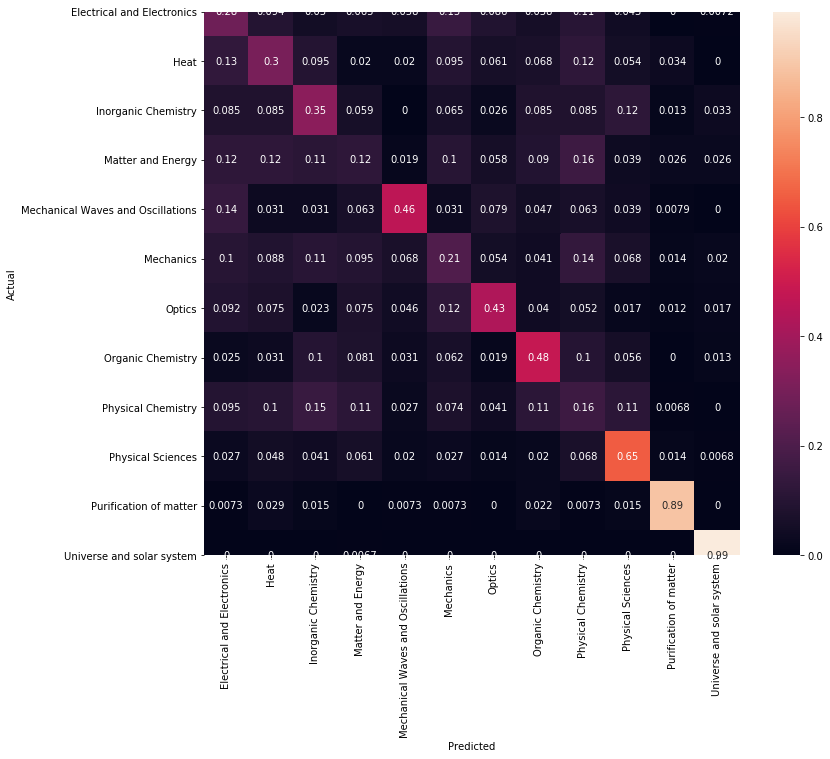

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
index = ['Electrical and Electronics',
 'Heat',
 'Inorganic Chemistry',
 'Matter and Energy',
 'Mechanical Waves and Oscillations',
 'Mechanics',
 'Optics',
 'Organic Chemistry',
 'Physical Chemistry',
 'Physical Sciences',
 'Purification of matter',
 'Universe and solar system']
columns = ['Electrical and Electronics',
 'Heat',
 'Inorganic Chemistry',
 'Matter and Energy',
 'Mechanical Waves and Oscillations',
 'Mechanics',
 'Optics',
 'Organic Chemistry',
 'Physical Chemistry',
 'Physical Sciences',
 'Purification of matter',
 'Universe and solar system']
cm_df = pd.DataFrame(confusion_matrix,columns,index)                      
plt.figure(figsize=(12,10))  
sns.heatmap(cm_df, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('life_sci_plot_confusion_matrix.png')

In [57]:
target_names = ['Electrical and Electronics',
 'Heat',
 'Inorganic Chemistry',
 'Matter and Energy',
 'Mechanical Waves and Oscillations',
 'Mechanics',
 'Optics',
 'Organic Chemistry',
 'Physical Chemistry',
 'Physical Sciences',
 'Purification of matter',
 'Universe and solar system']
print(classification_report(rounded_labels, y_pred_ohe, target_names=target_names))
plt.savefig()

                                   precision    recall  f1-score   support

       Electrical and Electronics       0.24      0.28      0.26       139
                             Heat       0.30      0.30      0.30       148
              Inorganic Chemistry       0.33      0.35      0.34       153
                Matter and Energy       0.17      0.12      0.14       155
Mechanical Waves and Oscillations       0.57      0.46      0.51       127
                        Mechanics       0.22      0.21      0.21       148
                           Optics       0.54      0.43      0.48       173
                Organic Chemistry       0.47      0.48      0.48       160
               Physical Chemistry       0.15      0.16      0.16       148
                Physical Sciences       0.53      0.65      0.59       147
           Purification of matter       0.87      0.89      0.88       137
        Universe and solar system       0.89      0.99      0.94       149

                       

TypeError: savefig() missing 1 required positional argument: 'fname'

<Figure size 432x288 with 0 Axes>

In [ ]:
fpr, tpr, _ = metrics.roc_curve(rounded_labels,  y_pred_ohe)
auc = metrics.roc_auc_score(rounded_labels, y_pred_ohe)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [60]:
multiclass_roc_auc_score(rounded_labels, y_pred_ohe)

0.6969026644870263

In [ ]:
fpr, tpr, _ = metrics.roc_curve(rounded_labels,  y_pred_ohe)
auc = metrics.roc_auc_score(rounded_labels, y_pred_ohe)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
%%bash
tar -czf vishal.tar.gz '/home/ubuntu/vishal/bo_tagging'